# Data Analysis

In [1]:
execution_mode = 'tune'

For understanding the bibliographic catalogue data of the Swissbib platform, the project team has generated a sample .json file with a big amount of representative records. This chapter shows the analysis of this data delivery.

## Table of Contents

- [Sample Records Analysis](#Sample-Records-Analysis)
    - [Book](#Book)
    - [Music](#Music)
    - [Video Material](#Video-Material)
    - [Map](#Map)
    - [Periodical](#Periodical)
    - [Collection](#Collection)
    - [Computer File](#Computer-File)
- [General Observation](#General-Observation)
- [Attribute Analysis](#Attribute-Analysis)
    - [Table of Contents of Attribute Analysis](#Table-of-Contents-of-Attribute-Analysis)
- [Summary](#Summary)
    - [Metadata Handover](#Metadata-Handover)

## Sample Records Analysis

In this section, the data file will be loaded and some sample data records will be shown.

In [2]:
path_data = './data'

! unzip $path_data/datafile.zip -d $path_data/

Archive:  ./data/datafile.zip
  inflating: ./data/job7r4A1.json    

Swissbib has provided a data file with a big amount of sample records. This file has a size of more than 100MB. Due to its size, it cannot be checked in into a github repository. To check in the file nonetheless, it has been compressed with a standard zip format. The code cell above extracts the file and stores it in the same directory as its original zip file.

In [3]:
import os
import json

records = []
path_goldstandard = './daten_goldstandard'

for line in open(os.path.join(path_data, 'job7r4A1.json'), 'r'):
    records.append(json.loads(line))

print('Number of data records loaded', len(records))

Number of data records loaded 183407


In [4]:
#! zip datafile.zip $path_data/job7r4A1.json

# Swissbib's data file is not needed in unzipped form anymore
if os.path.exists(os.path.join(path_data, 'job7r4A1.json')):
    # Delete data file
    os.remove(os.path.join(path_data, 'job7r4A1.json'))

The data has been read into a list of records. Now, the extracted data file is not needed anymore and can be removed with the goal to keep the original zip file, only.

Let's have a look at the loaded data.

In [5]:
import pandas as pd

# Generate Pandas DataFrame object out of the raw data
df = pd.DataFrame(records)

# Extend display to number of columns of DataFrame
pd.options.display.max_columns = len(df.columns)

df.head()

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,edition,part,pages,volumes,pubinit,pubword,scale,coordinate,doi,ismn,musicid,format
0,554061449,"[(OCoLC)1085491204, (IDSBB)006899773]",[],"{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'100': ['SchluchterAndré'], '700': [], '800':...","{'110': [], '710': [], '810': []}",1992,1992,1992,1992,,[],[S. 102-114],[S. 102-114],[],[],,[],[],[],,[BK020000]
1,554061481,"[(OCoLC)1085491341, (IDSBB)006899983]",[],{'245': ['Reimereien']},{'245': ['Reimereien']},"{'100': ['NaegeliWerner'], '700': [], '800': [...","{'110': [], '710': [], '810': []}",1986,1986,1986,1986,,[],[43 S.],[43 S.],[],[],,[],[],[],,[BK020000]
2,554061503,"[(OCoLC)1085491299, (IDSBB)006899959]",[],{'245': ['Efficax antidotum ad matrimonia mixt...,{'245': ['Efficax antidotum ad matrimonia mixt...,"{'100': ['KellyM.V.'], '700': ['GeniesseJ.B.']...","{'110': [], '710': [], '810': []}",1923,1923,1923,1923,,[],[75 p.],[75 p.],[],[],,[],[],[],,[BK020000]
3,554061511,"[(OCoLC)1085491268, (IDSBB)006896614]",[],"{'245': ['Probleme der Inflationsbekämpfung', ...","{'245': ['Probleme der Inflationsbekämpfung', ...","{'100': ['WegelinWalter'], '700': [], '800': [...","{'110': [], '710': [], '810': []}",1947,1947,1947,1947,,[],[24 S.],[24 S.],[],[],,[],[],[],,[BK020000]
4,55406152X,"[(OCoLC)1085491079, (IDSBB)006896866]",[],{'245': ['[Poems]']},{'245': ['[Poems]']},"{'100': ['OberlinUrs'], '700': [], '800': [], ...","{'110': [], '710': [], '810': []}",1991,1991,1991,1991,,[],[p. 14-15],[p. 14-15],[],[],,[],[],[],,[BK020000]


In [6]:
print('Number of records {:d}, number of attributes per record {:d}.\n'.format(
    len(df), len(df.columns)))

df.info()

Number of records 183407, number of attributes per record 23.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183407 entries, 0 to 183406
Data columns (total 23 columns):
docid         183407 non-null object
035liste      183407 non-null object
isbn          183407 non-null object
ttlfull       183407 non-null object
ttlpart       183407 non-null object
person        183407 non-null object
corporate     183407 non-null object
pubyear       183407 non-null object
decade        183407 non-null object
century       183407 non-null object
exactDate     183407 non-null object
edition       183407 non-null object
part          183407 non-null object
pages         183407 non-null object
volumes       183407 non-null object
pubinit       183407 non-null object
pubword       183407 non-null object
scale         183407 non-null object
coordinate    183407 non-null object
doi           183407 non-null object
ismn          183407 non-null object
musicid       183407 non-null object
format      

Swissbib data describes different kinds of bibliographic units, see [format](#format). The following subsections show some sample data for such units. The format is interpreted roughly in these subsections, compare Swissbib's [format codes](http://www.swissbib.org/wiki/index.php?title=Filtering#format_codes) [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [7]:
df.format.str[0].str[:2].unique()

array(['BK', 'MU', 'VM', 'MP', 'CR', 'CL', 'CF', nan], dtype=object)

### Book

A format code starting with $\texttt{BK}$ stands for a bibliographic unit of a book or an article. A sample record is shown below.

In [8]:
df.loc[df[df.format.str[0].str[:2]=='BK'].index[0]]

docid                                                 554061449
035liste                  [(OCoLC)1085491204, (IDSBB)006899773]
isbn                                                         []
ttlfull       {'245': ['Die Feist von Kienberg', 'eine Wasen...
ttlpart       {'245': ['Die Feist von Kienberg', 'eine Wasen...
person        {'100': ['SchluchterAndré'], '700': [], '800':...
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                1992    
decade                                                     1992
century                                                    1992
exactDate                                              1992    
edition                                                        
part                                                         []
pages                                              [S. 102-114]
volumes                                            [S. 102-114]
pubinit                                 

### Music

A format code starting with $\texttt{MU}$ stands for a bibliographic unit that is related to music. A sample record is shown below.

In [9]:
df.loc[df[df.format.str[0].str[:2]=='MU'].index[0]]

docid                                                 554098806
035liste                  [(OCoLC)1085495414, (IDSBB)007052696]
isbn                                                         []
ttlfull                             {'245': ['Violin sonatas']}
ttlpart                             {'245': ['Violin sonatas']}
person        {'100': ['BrahmsJohannes'], '700': ['SchayeghL...
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                20182018
decade                                                     2018
century                                                    2018
exactDate                                              20182018
edition                                                        
part                                                         []
pages                                            [1 CD (69:42)]
volumes                                          [1 CD (69:42)]
pubinit                                 

### Video Material

A format code starting with $\texttt{VM}$ represents some film material. A sample record is shown below.

In [10]:
df.loc[df[df.format.str[0].str[:2]=='VM'].index[0]]

docid                                                 554098911
035liste      [(OCoLC)1065768412, (IDSBB)007052702, (OCoLC)1...
isbn                         [978-3-946274-20-9, 3-946274-20-X]
ttlfull       {'245': ['Kunst und Gemüse, A. Hipler', 'Art a...
ttlpart       {'245': ['Kunst und Gemüse, A. Hipler', 'Art a...
person        {'100': [], '700': ['SchlingensiefChristoph', ...
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                20182008
decade                                                     2018
century                                                    2018
exactDate                                              20182008
edition                                                        
part                                                     [2004]
pages                                  [2 DVD-Videos (283 min)]
volumes                                [2 DVD-Videos (283 min)]
pubinit                                 

### Map

A format code starting with $\texttt{MP}$ is a map. A sample record is shown below.

In [11]:
df.loc[df[df.format.str[0].str[:2]=='MP'].index[0]]

docid                                                 554099039
035liste                  [(OCoLC)1085495396, (IDSBB)007052708]
isbn                                                         []
ttlfull       {'245': ['Nova descriptio Comitatus Hollandiæ'...
ttlpart       {'245': ['Nova descriptio Comitatus Hollandiæ'...
person        {'100': ['BlaeuWillem Janszoon'], '700': [], '...
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                19931604
decade                                                     1993
century                                                    1993
exactDate                                              19931604
edition                                               Facsimile
part                                                         []
pages                                                 [1 Karte]
volumes                                               [1 Karte]
pubinit                                 

### Periodical

A format code starting with $\texttt{CR}$ is a bibliographic unit of a periodical. A sample record is shown below.

In [12]:
df.loc[df[df.format.str[0].str[:2]=='CR'].index[0]]

docid                                                 55409939X
035liste                   [(OCoLC)699516877, (IDSBB)007052728]
isbn                                                [1533-4406]
ttlfull       {'245': ['The new England journal of medicine ...
ttlpart       {'245': ['The new England journal of medicine ...
person          {'100': [], '700': [], '800': [], '245c': ['']}
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                18121826
decade                                                     1812
century                                                    1812
exactDate                                              18121826
edition                                                        
part                                                         []
pages                                        [Online-Ressource]
volumes                                      [Online-Ressource]
pubinit                                 

### Collection

A format code starting with $\texttt{CL}$ is a collection. A sample record is shown below.

In [13]:
df.loc[df[df.format.str[0].str[:2]=='CL'].index[0]]

docid                                                 554101610
035liste                  [(OCoLC)1085510940, (IDSBB)007052979]
isbn                                                         []
ttlfull       {'245': ['[St. Gallischer Hilfsverein - Sankt ...
ttlpart       {'245': ['[St. Gallischer Hilfsverein - Sankt ...
person          {'100': [], '700': [], '800': [], '245c': ['']}
corporate     {'110': ['St. Gallischer Hilfsverein'], '710':...
pubyear                                                20179999
decade                                                     2017
century                                                    2017
exactDate                                              20179999
edition                                                        
part                                                         []
pages                                                 [1 Mappe]
volumes                                               [1 Mappe]
pubinit                                 

### Computer File

A format code starting with $\texttt{CF}$ is a placeholder for a computer file on any kind of storage. A sample record is shown below.

In [14]:
df.loc[df[df.format.str[0].str[:2]=='CF'].index[0]]

docid                                                 554144301
035liste                   [(IDSBB)007008154, (RERO)R007245313]
isbn                                                         []
ttlfull       {'245': ['Ice Age 4', 'voll verschoben : die a...
ttlpart       {'245': ['Ice Age 4', 'voll verschoben : die a...
person          {'100': [], '700': [], '800': [], '245c': ['']}
corporate                     {'110': [], '710': [], '810': []}
pubyear                                                2012    
decade                                                     2012
century                                                    2012
exactDate                                              2012    
edition                                                        
part                                                         []
pages                                         [1 Speicherkarte]
volumes                                       [1 Speicherkarte]
pubinit                                 

## General Observation

As can be observed in the sample records displayed above, the attributes of the records are stored in basic Python datatypes like strings, lists (of strings), and dictionaries. A look into the raw data file confirms this observation.

In [15]:
! head -n 2 ./data/job7r4A1.json

head: ./data/job7r4A1.json: No such file or directory


A specific analysis on each attribute, its meaning and contents will be done as a next step. For the upcoming analysis, each attribute of the data records is assigned to its specific group type. This is done with the help of a global dictionary variable $\texttt{columns}\_\texttt{metadata}\_\texttt{dict}$.

In [16]:
columns_metadata_dict = {}

## Attribute Analysis

This section analyses the attributes provided by the Swissbib data extracts. The extracted data is used as a basis for the machine learning models in the capstone project. The attributes are based on the MARC 21 Format for Bibliographic Data [[MARC](./A_References.ipynb#marc21)] and are documented on a Swissbib wikipedia page [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [17]:
df.columns

Index(['docid', '035liste', 'isbn', 'ttlfull', 'ttlpart', 'person',
       'corporate', 'pubyear', 'decade', 'century', 'exactDate', 'edition',
       'part', 'pages', 'volumes', 'pubinit', 'pubword', 'scale', 'coordinate',
       'doi', 'ismn', 'musicid', 'format'],
      dtype='object')

This section provides and uses some functions that have been written for supporting the analysis of the attributes as well as for data preprocessing in the upcoming chapters. These functions have been defined in separate code files.

- [data_analysis_funcs.py](./data_analysis_funcs.py)
- [data_preparation_funcs.py](./data_preparation_funcs.py)

In [18]:
import data_analysis_funcs as daf
import data_preparation_funcs as dpf

### Table of Contents of Attribute Analysis

- [035liste](#035liste)
- [century](#century)
- [coordinate](#coordinate)
- [corporate](#corporate)
- [decade](#decade)
- [docid](#docid)
- [doi](#doi)
- [edition](#edition)
- [exactDate](#exactDate)
- [format](#format)
- [isbn](#isbn)
- [ismn](#ismn)
- [musicid](#musicid)
- [pages](#pages)
- [part](#part)
- [person](#person)
- [pubinit](#pubinit)
- [pubword](#pubword)
- [pubyear](#pubyear)
- [scale](#scale)
- [ttlfull](#ttlfull)
- [ttlpart](#ttlpart)
- [volumes](#volumes)

In [19]:
columns_metadata_dict['data_analysis_columns'] = []

### 035liste

In [20]:
columns_metadata_dict['list_columns'] = ['035liste']

Attribute $\texttt{035liste}$ holds a list of identifiers from the originating library of a bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Each record of the Swissbib data holds at least one identifier. Some examples are shown below.

In [21]:
daf.find_empty_in_column(df, columns_metadata_dict, '035liste')

Number of records with filled 035liste 183407, with missing 035liste 0 => 100.0%


In [22]:
df['035liste'].apply(lambda x : len(x)).sort_values().head(5)

83463     1
150669    1
150668    1
150667    1
150666    1
Name: 035liste, dtype: int64

In [23]:
df['035liste'].apply(lambda x : len(x)).sort_values().tail(10)

144185    20
54084     21
30793     21
136608    21
61603     21
14755     21
49974     22
139972    22
139191    23
124359    23
Name: 035liste, dtype: int64

In [24]:
print('Some sample identifiers:')
df['035liste'].sample(n=10)

Some sample identifiers:


61051     [(VAUD)991021205698302852, (EXLNZ-41BCULAUSA_N...
123302    [(VAUD)991021219027002852, (EXLNZ-41BCULAUSA_N...
20839                                    [(RERO)R008840219]
147023                [(OCoLC)1089442002, (NEBIS)011369389]
10403                    [(IDSBB)007025827, (SBT)000770663]
114593                                   [(RERO)R008900306]
76539                  [(OCoLC)903383522, (NEBIS)011352514]
147865                 [(OCoLC)1089442773, (SGBN)001450149]
170220                                         [(CEO)25034]
27703                  [(OCoLC)1085536673, (SGBN)001446009]
Name: 035liste, dtype: object

Attribute $\texttt{035liste}$ is the central attribute for finding duplicates in the training data of the Swissbib's goldstandard. This process will be explained and implemented in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

### century

In [25]:
columns_metadata_dict['strings_columns'] = ['century']

In [26]:
daf.find_empty_in_column(df, columns_metadata_dict, 'century')

Number of records with filled century 183407, with missing century 0 => 100.0%


Attribute $\texttt{century}$ holds strings of length 4 that can predominantly be interpreted as year-dates [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Some examples and the top-most quantity distribution are shown below.

In [27]:
df['century'].sample(n=15)

47360     2010
63697     1999
149972    1964
169449    2008
41649     2011
29384     2011
170267    2014
114484    1787
120130    uuuu
160214    1985
25195     2018
130682    1995
53318     uuuu
108479    uuuu
173031    2013
Name: century, dtype: object

In [28]:
df.century.value_counts(normalize=True).head(10)

2018    0.208389
2019    0.086785
2017    0.046350
uuuu    0.036236
2016    0.025223
1999    0.020201
2015    0.019879
2014    0.018156
2012    0.016286
2013    0.015616
Name: century, dtype: float64

If the year-date is unclear to some extent or no year-date of the unit is registered, letter 'u' is used as a placeholder of the unknown digit.

In [29]:
df.century[df.century.str.contains('u')].unique()

array(['uuuu', 'u826', '193u', '197u', '192u', '19uu', '200u', '198u',
       '189u', '188u', '18uu', '201u', '20uu', 'u829', '195u', '218u',
       '196u', '17uu', '1uuu', '199u', 'u611', '191u', '190u', 'u713',
       'u999', '194u', 'u693', '186u', '184u', '15uu', 'uuu1'],
      dtype=object)

The above statement results in the same array like the following regular expression.

In [30]:
df.century[df.century.str.contains('[^0-9]')].unique()

array(['uuuu', 'u826', '193u', '197u', '192u', '19uu', '200u', '198u',
       '189u', '188u', '18uu', '201u', '20uu', 'u829', '195u', '218u',
       '196u', '17uu', '1uuu', '199u', 'u611', '191u', '190u', 'u713',
       'u999', '194u', 'u693', '186u', '184u', '15uu', 'uuu1'],
      dtype=object)

In [31]:
df.century[~df.century.str.contains('[u]')].unique()

array(['1992', '1986', '1923', '1947', '1991', '1967', '1950', '1985',
       '1983', '1942', '1883', '1990', '1984', '1989', '1993', '1961',
       '1940', '1981', '1988', '1858', '1978', '1977', '1880', '1945',
       '1963', '1912', '1884', '1937', '1956', '1943', '1916', '1960',
       '1980', '1936', '1906', '1987', '1955', '1944', '1953', '1930',
       '1903', '1913', '1938', '1895', '1905', '1920', '1918', '1857',
       '1928', '1881', '1932', '1900', '1924', '1915', '1931', '1927',
       '1919', '1896', '1922', '1871', '1926', '1939', '1907', '1776',
       '1873', '1893', '1968', '1975', '1946', '1833', '1855', '1949',
       '1962', '1971', '1959', '1966', '1862', '1898', '1901', '1904',
       '1902', '1951', '1909', '1929', '1921', '1882', '1964', '1911',
       '1957', '1897', '1910', '1867', '1914', '1908', '1958', '1934',
       '1933', '1872', '1845', '1979', '1954', '1885', '1810', '1891',
       '1869', '1876', '1889', '1836', '1952', '1935', '1948', '1917',
      

The following graph shows the publishing activity of Western European literature. Be aware that the displayed data is only an extract of the full Swissbib data, though.

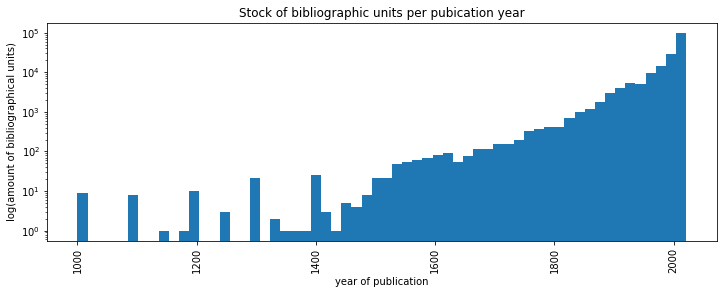

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

plt.hist(df.century[~df.century.str.contains('[u]')].astype(int), bins=60, log=True)
plt.xticks(rotation='vertical')
plt.title('Stock of bibliographic units per pubication year')
plt.xlabel('year of publication')
plt.ylabel('log(amount of bibliographical units)')
plt.show()

With its data extract [[SwRe](./A_References.ipynb#swre)], Swissbib forwards the year of publication of a bibliographic unit in attribute $\texttt{century}$ [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)], if the bibliographic unit has been published in a specific year as may be the case for a regular book. If the bibliographic unit has been published during a time period, like for example a periodical, the first year of publication is stored [[WiCo2001](./A_References.ipynb#wico2001)].

In Swissbib's deduplication implementation, the attribute has a different meaning, though, holding the century of publication instead of its full year [[WiCo2001](./A_References.ipynb#wico2001)]. The data extract offers with $\texttt{decade}$ an additional attribute holding the same data as $\texttt{century}$. Even more, attributes $\texttt{exactDate}$ and $\texttt{pubyear}$ offer an extended version of attribute $\texttt{century}$. Due to these redundancies, the attribute will be dropped for the feature matrix and one of the extended attributes with the same data will be taken into account, see below.

In [33]:
#columns_metadata_dict['data_analysis_columns'] = ['century']

### coordinate

In [34]:
columns_metadata_dict['list_columns'] = ['coordinate']

Attribute $\texttt{coordinate}$ holds geographical coordinate information on the related bibliographical unit of format map.

In [35]:
daf.find_empty_in_column(df, columns_metadata_dict, 'coordinate')

Number of records with filled coordinate 730, with missing coordinate 182677 => 0.4%


In [36]:
daf.find_empty_in_column(df[df.format.str[0].str[:2]=='MP'], columns_metadata_dict, 'coordinate')

Number of records with filled coordinate 729, with missing coordinate 183 => 79.9%


In [37]:
df['coordinate'][df.format.str[0].str[:2]=='MP'].sample(n=10)

19551     [E0081100, N0474200]
29684     [W0003700, N0522600]
113741    [E0085818, N0471239]
76809     [E0185900, N0605200]
31078     [E0091556, N0471108]
111655    [E0080952, N0471312]
111777    [E0095853, N0464538]
126812    [E0070042, N0465703]
76442     [E0232100, N0354700]
114796    [E0063310, N0465340]
Name: coordinate, dtype: object

The attribute stores its values in the form of a list. The list may hold more than two specific coordinate values. A specific coordinate value is mostly of length 8 characters.

In [38]:
df_maps = df.loc[df.coordinate.apply(lambda x : len(x))[df.format.str[0].str[:2]=='MP'].index]
df_maps.coordinate[df_maps.coordinate.apply(lambda x : len(x)) > 2].sample(n=10)

53969           [E0080312, E0080322, N0475934, N0475924]
15139     [E012.500000, E0123000, N046.750000, N0464500]
59044           [E0083032, E0083000, N0472444, N0472400]
132971          [E0073924, E0073928, N0465238, N0465239]
20644           [E0054415, E0054415, N0480000, N0480005]
143472          [E0064728, E0064725, N0461460, N0461455]
131800          [E0072815, E0072819, N0460829, N0460834]
137875          [E0074200, E0074200, N0463427, N0463400]
138344          [E0053613, E0053623, N0475929, N0475919]
144673          [E0071030, E0071454, N0472004, N0471948]
Name: coordinate, dtype: object

In [39]:
df.coordinate.loc[15139][0] + ' transforms to ' + df.coordinate.loc[15139][0].replace('.', '')[:8].upper()

'E012.500000 transforms to E0125000'

In [40]:
df.coordinate.loc[15139][0].replace('.', '')[:8].upper()

'E0125000'

Attribute $\texttt{coordinate}$ is a relevant identifying attribute for duplicates of maps. The attribute will be used for pair comparison in the feature matrix. The format of its filled list is slightly complicated, though. The contents of the field will be transformed with the help of a function $\texttt{.split}\_\texttt{coordinate()}$, [[WiCo2001](./A_References.ipynb#wico2001)].

In [41]:
df = dpf.split_coordinate(df)

The function extracts the first element of the list starting with letter 'E' for East or 'W' for West. It then normalizes the string to a string of length 8, removing all '.' and ' ' characters beforehand. The resulting string element is stored in a new attribute $\texttt{coordinate}\_\texttt{E}$.

In [42]:
df.coordinate_E[df.coordinate_E.apply(lambda x : x!='')].sample(n=20)

15752     e0074122
104201    w1244400
24578     e0071432
105255    e0085200
13521     e0072400
104821    e0073215
126871    e0064700
95429     w0001200
61315     e0081034
123527    e0071428
36138     e0690100
126874    e0065350
106184    e0105500
27273     e0130037
113751    w0022600
126872    e0065352
126798    e0064654
70860     e0074100
114771    e0063958
133210    e0160900
Name: coordinate_E, dtype: object

As a next step, the same procedure is done with the first list element starting with letter 'N' for North or 'S' for South. The resulting string element is stored in a new attribute $\texttt{coordinate}\_\texttt{N}$.

In [43]:
df.coordinate_N[df.coordinate_N.apply(lambda x : x!='')].sample(n=20)

146676    n0470015
25056     s0221000
146880    n0464931
105576    n0000000
106191    n0481500
31077     n0472156
138603    n0473900
35991     n0460520
126754    n0464040
126868    n0465345
59416     n0491500
147071    n0484500
113772    n0471220
182740    n0465035
111774    n0463315
114429    n0470625
36018     n0470936
126815    n0465703
106165    n0461114
114705    n0470552
Name: coordinate_N, dtype: object

In [44]:
print('East / west coordinates? ', df.coordinate_E.str[0].unique())
print('North / south coordinates? ', df.coordinate_N.str[0].unique())

East / west coordinates?  [nan 'e' 'w']
North / south coordinates?  [nan 'n' 's']


Both new attributes are used for further processing, while the original attribute $\texttt{coordinate}$ is dropped.

In [45]:
columns_metadata_dict['data_analysis_columns'].append('coordinate_E')
columns_metadata_dict['data_analysis_columns'].append('coordinate_N')

### corporate

In [46]:
columns_metadata_dict['strings_columns'].append('corporate')

Attribute $\texttt{corporate}$ is a collection of corporate names of the bibliographical unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The attribute out of the raw data comes along as a dictionary column in the DataFrame with three different key value pairs. For a first analysis in this subsection, attribute $\texttt{corporate}$ will be split into a separate attribute for each key of the dictionary using a special function $\texttt{.transform}\_\texttt{dictionary}\_\texttt{to}\_\texttt{list()}$. The values then come along as lists and the implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string()}$ will be used to process its elements into one single string of the new column.

In [47]:
df.corporate.sample(n=20)

156160    {'110': ['Universiade. Comité d'organisation. ...
58060                     {'110': [], '710': [], '810': []}
158299    {'110': ['Summer Olympic Games. Organizing Com...
59023                     {'110': [], '710': [], '810': []}
86770                     {'110': [], '710': [], '810': []}
159923    {'110': ['Salzburg 2014 Bid Committee'], '710'...
68360                     {'110': [], '710': [], '810': []}
3179                      {'110': [], '710': [], '810': []}
19469                     {'110': [], '710': [], '810': []}
18515                     {'110': [], '710': [], '810': []}
173781                    {'110': [], '710': [], '810': []}
168417                    {'110': [], '710': [], '810': []}
59621                     {'110': [], '710': [], '810': []}
156632    {'110': ['International Olympic Committee'], '...
77638                     {'110': [], '710': [], '810': []}
138072                    {'110': [], '710': [], '810': []}
112414                    {'110': [], '7

In [48]:
for ending in ['110', '710', '810']:
    df = dpf.transform_dictionary_to_list(df, 'corporate', ending)
    df = dpf.transform_list_to_string(df, 'corporate_'+ending)

    columns_metadata_dict['strings_columns'].append('corporate_'+ending)
    daf.find_empty_in_column(df, columns_metadata_dict, 'corporate_'+ending)

Number of records with filled corporate_110 11370, with missing corporate_110 172037 => 6.2%


Number of records with filled corporate_710 23123, with missing corporate_710 160284 => 12.6%


Number of records with filled corporate_810 57, with missing corporate_810 183350 => 0.0%


The attribute is sparsely filled. This is due to the fact that most of Swissbib's bibliographical units are units produced by persons, not corporates.

In [49]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110!=df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0)].count()

corporate_110    11349
corporate_710    11349
dtype: int64

In [50]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110==df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0)].count()

corporate_110    21
corporate_710    21
dtype: int64

In [51]:
df[['corporate_110', 'corporate_710']][
    (df.corporate_110!=df.corporate_710) &
    (df.corporate_110.apply(lambda x : len(x))!=0) &
    (df.corporate_710.apply(lambda x : len(x))!=0)
].head()

,corporate_110,corporate_710
10383,verein deutscher bibliothekareregionalverband ...,verein deutscher bibliothekareregionalverband ...
14064,slavs and tatars,"kunsthalle im lipsiusbau, kunstverein hannover"
14918,heilsarmeenationales hauptquartier bern,salvation armynationales hauptquartier
15687,berner alpenbahn-gesellschaft bern-lötschberg-...,lötschbergbahn
16185,jordan schnitzer family foundation,hallie ford museum of art


The attribute holds different data in its dictionary key 110 compared to its dictionary key 710. Both key values of $\texttt{corporate}$ seem to be relevant for the model. Some examples are shown below.

In [52]:
df.corporate_110[df.corporate_110.apply(lambda x : len(x))!=0].sample(n=20)

150166    panamerican sportive games. organizing committ...
167899    summer youth olympic games. organizing committ...
149289    international olympic committee. evaluation co...
159980    summer olympic games. organizing committee. 9,...
114039                                orchesterverein brugg
32537                                     pro infirmis bern
51344                           england and walesparliament
151157    summer olympic games. organizing committee. 29...
158898                          british olympic association
166235    summer olympic games. organizing committee. 27...
30148        amies de la jeune fille du canton de neuchâtel
151107    summer olympic games. organizing committee. 25...
159128    olympic winter games. organizing committee. 23...
92482                                      montres rolex sa
160798         centre international pour la trêve olympique
126727    basel-stadtgrosser ratumwelt-, verkehrs- und e...
170772             nagano winter olympic

In [53]:
df.corporate_710[df.corporate_710.apply(lambda x : len(x))!=0].sample(n=20)

145966                                   kamernij chor kyïv
84613       suisseservice suisse d'enquête de sécurité sese
175788            musée suisse de gymnastique et des sports
106182    kanton st.gallenberufs- und laufbahnberatung, ...
25801                  crait + müller, hôtel drouot (paris)
101987                                    aciera (le locle)
75338                                  the bichel committee
25594     chambre de commerce et d'industrie du canton d...
10953                                               killers
14947                                         black sabbath
14433                                            fondamento
174824    american chemical societydivision of air, wate...
93813                               schweizfinanzdelegation
4853                                        backstreet boys
155954    france. ministère de la jeunesse et des sports...
137549    unione del commercio, del turismo e dei serviz...
17230     schweizerischer evangelischer 

In [54]:
df.corporate_810[df.corporate_810.apply(lambda x : len(x))!=0].sample(n=20)

72562                             werbung kiser
110574                                hema maps
110586                  hallwag kümmerly + frey
72556                             werbung kiser
106150                  hallwag kümmerly + frey
86065                   hallwag kümmerly + frey
61902                   hallwag kümmerly + frey
133739      deutschlandverteidigungsministerium
106184                  hallwag kümmerly + frey
113869                  peter-ochs-gesellschaft
110576                                hema maps
106156                  hallwag kümmerly + frey
110597                  hallwag kümmerly + frey
72532                             werbung kiser
52134           kunsthandlung helmut h. rumbler
133537    schweizbundesamt für landestopografie
94678                                 hécatombe
25406     schweizbundesamt für landestopografie
110598                  hallwag kümmerly + frey
72548                             werbung kiser
Name: corporate_810, dtype: object

In [55]:
df.corporate[(df.corporate_110 != df.corporate_810) &
             (df.corporate_810.apply(lambda x : len(x))!=0)]

45080     {'110': [], '710': [], '810': ['Wirtschaftsuni...
47145     {'110': ['Biochemical Society (Great Britain)S...
52134     {'110': [], '710': ['Kunsthandlung Helmut H. R...
94673     {'110': [], '710': ['Ensemble Batida', 'Hécato...
94674     {'110': [], '710': ['Ensemble Batida', 'Hécato...
94678     {'110': [], '710': ['Ensemble Batida', 'Hécato...
94679     {'110': [], '710': ['Ensemble Batida', 'Hécato...
94680     {'110': [], '710': ['Ensemble Batida', 'Hécato...
113869    {'110': [], '710': [], '810': ['Peter-Ochs-Ges...
113870    {'110': [], '710': [], '810': ['Peter-Ochs-Ges...
133706    {'110': ['Carnegie Endowment for International...
133739    {'110': [], '710': [], '810': ['DeutschlandVer...
143892    {'110': ['Judge Advocate General's School (Uni...
Name: corporate, dtype: object

Only a few records hold data in attribute $\texttt{corporate}$ with key 810. Furthermore, attribute $\texttt{corporate}$ at key 810 stores strongly redundant data to $\texttt{corporate}$ at key value 110. Therefore, attribute $\texttt{corporate}$ with key 810 will be dropped [[WiCo2001](./A_References.ipynb#wico2001)].

The contents of attribute $\texttt{corporate}$ results from varying interpretation and filling. Some institutions have used key 110 and others 710 as their leading corporate data field. Swissbib's recommendation therefore is to concatenate the two remaining $\texttt{corporate}$ fields into one single $\texttt{corporate}$ field [[WiCo2001](./A_References.ipynb#wico2001)]. The two remaining attributes will be taken into one and will be processed as one singe attribute in the feature matrix generation. This will be implemented in a separate function $\texttt{.concatenate}\_\texttt{corporate}\_\texttt{keys()}$, the result of which is shown below for some sample cases.

In [56]:
df = dpf.concatenate_corporate_keys(df)
df[['corporate_full', 'corporate_110', 'corporate_710']].loc[[0, 6, 1852, 14405, 183000, 183009]]

,corporate_full,corporate_110,corporate_710
0,,,
6,christkatholische kirchgemeinde (bern),,christkatholische kirchgemeinde (bern)
1852,the keywords project,the keywords project,
14405,zéphyr combo,zéphyr combo,zéphyr combo
183000,fbm communications (zürich) theater 11 (zürich),fbm communications (zürich),theater 11 (zürich)
183009,spinas civil voices (zürich) fairmed (bern),spinas civil voices (zürich),fairmed (bern)


In [57]:
len(df['corporate_full'].loc[0])

0

In [58]:
display(df.corporate_full[df.corporate_110.apply(lambda x : len(x))!=0].sample(n=20))
display(df.corporate_full[df.corporate_710.apply(lambda x : len(x))!=0].sample(n=20))

171145    gobierno de la ciudad de buenos aires summer y...
164387           union internationale de pentathlon moderne
159966    panamerican sportive games. organizing committ...
51844     england and walessovereign (1660-1685 : charle...
162230                     pan american sports organization
151934       nationales olympisches komitee für deutschland
149503    olympic winter games. organizing committee. 16...
152351    summer olympic games. organizing committee. 20...
150388         melbourne olympic candidature 1996 committee
99716                                      caritas freiburg
153550    olympic winter games. organizing committee. 14...
158331          burson-marsteller tse consulting (lausanne)
158735    summer olympic games. organizing committee. 27...
154607    olympic winter games. organizing committee. 16...
169911                            detroit olympic committee
167757                      international olympic committee
153683    pyeongchang 2014 olympic winte

4334                                                  dawes
68506     deutsche gesellschaft für erziehungswissenscha...
49160          chiesa cattolica, pezzana, niccolò (venezia)
22229                          berkeley linguistics society
6383                                         bouts ensemble
148130                        springerlink (online service)
54323     institut für rohrleitungsbau an der fachhochsc...
153902                    azienda generale italiana petroli
144532    securitas ag, schweizerische bewachungsgesells...
174064                         medienprojekt wuppertal e.v.
56946         american society for metalshandbook committee
11799                             phace, ensemble recherche
112574     deutscher genossenschafts- und raiffeisenverband
115315                               museum voor naaldkunst
162104                        fédération française de voile
144957     schweizbundesamt für umwelt, wald und landschaft
14070                      bibelheim böb

In [59]:
columns_metadata_dict['data_analysis_columns'].append('corporate_full')

### decade

In [60]:
columns_metadata_dict['strings_columns'].append('decade')

In [61]:
df[df.decade != df.century]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,coordinate,doi,ismn,musicid,format,coordinate_E,coordinate_N,corporate_110,corporate_710,corporate_810,corporate_full


Attribute $\texttt{decade}$ holds identical data to attribute $\texttt{century}$, out of Swissbib's data extract [[SwRe](./A_References.ipynb#swre)], see above and its identical MARC 21 definition [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)]. The purpose of the field in Swissbib's conventional deduplication implementation is to hold the decade of the year of origin of a bibliographic unit and store it for comparison [[WiCo2001](./A_References.ipynb#wico2001)].

Chapter [Feature Matrix Generation](./3_FeatureMatrixGeneration.ipynb) will apply a similarity metric for $\texttt{exactDate}$ with an extension of the data of this attribute. Therefore, attribute $\texttt{decade}$ will be dropped for further processing.

### docid

In [62]:
columns_metadata_dict['strings_columns'].append('docid')

In [63]:
daf.find_empty_in_column(df, columns_metadata_dict, 'docid')

Number of records with filled docid 183407, with missing docid 0 => 100.0%


In [64]:
df.docid[0]

'554061449'

The $\texttt{docid}$ is a unique identifier for a record of the data set. The attribute will become important for identifying master records for their associated slave records, see chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb). It will not be used directly for the training of the model.

### doi

In [65]:
columns_metadata_dict['list_columns'].append('doi')

In [66]:
daf.find_empty_in_column(df, columns_metadata_dict, 'doi')

Number of records with filled doi 9553, with missing doi 173854 => 5.2%


Attribute $\texttt{doi}$ is a digital object identifier. As specified in [[MARC](./A_References.ipynb#marc21)], the field holds several standard numbers [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)]. The attribute holds a list of string elements. Some samples are shown below.

In [67]:
df.doi[df.doi.apply(lambda x : len(x))>0].head(20)

1899         [10.5451/unibas-007052902]
1937         [10.5451/unibas-007052953]
4710           [10.14361/9783839445334]
10480        [10.5451/unibas-007052913]
11917       [10.1007/978-1-4939-6572-4]
15775    [10.5771/1439-880X-2018-3-362]
16124            [10.3931/e-rara-74297]
16194           [10.4324/9781138604391]
16212            [10.3931/e-rara-74297]
16219            [10.3931/e-rara-74297]
16222            [10.3931/e-rara-74297]
16244            [10.3931/e-rara-74297]
16245            [10.3931/e-rara-74297]
16256            [10.3931/e-rara-74297]
16265           [10.4324/9781315562193]
16301           [10.4324/9781315692845]
16354            [10.3931/e-rara-74439]
16356                  [10.3726/b14897]
16447           [10.4324/9781315150918]
16637          [10.1186/1478-4505-8-31]
Name: doi, dtype: object

In [68]:
df.doi[df.doi.apply(lambda x : len(x))>0].sample(n=20)

39462                               [10.1515/9781400881895]
53526     [10.5167/uzh-165264, 10.1158/1078-0432.ccr-17-...
46637                               [10.1515/9783110211313]
46519                       [10.4159/harvard.9780674432888]
110738         [10.5167/uzh-162618, 10.1055/s-0038-1660503]
53528                                  [10.5167/uzh-165356]
43704                               [10.1524/9783486595123]
97799                   [10.1016/j.chemosphere.2018.11.187]
46697                       [10.4159/harvard.9780674432734]
126665    [10.3929/ethz-b-000328593, 10.1109/ICRA.2019.8...
93139                                [10.3931/e-rara-74806]
22278                            [10.5075/epfl-thesis-8729]
20789                            [10.3929/ethz-b-000309556]
30010                       [10.1080/17430437.2016.1273612]
49907                                  [10.5167/uzh-165046]
123375    [10.5167/uzh-162642, 10.11909/j.issn.1671-5411...
97056                                [10

In [69]:
df.loc[51889]

docid                                                     554871254
035liste          [(VAUD)991021210193902852, (CKB)41000000059582...
isbn                                                [3-319-93133-4]
ttlfull           {'245': ['IAEG/AEG Annual Meeting Proceedings,...
ttlpart           {'245': ['IAEG/AEG Annual Meeting Proceedings,...
person            {'100': [], '700': ['ShakoorAbdul', 'CatoKerry...
corporate                         {'110': [], '710': [], '810': []}
pubyear                                                    2019    
decade                                                         2019
century                                                        2019
exactDate                                                  2019    
edition                                               1st ed. 2019.
part                                                             []
pages                               [1 online resource (122 pages)]
volumes                             [1 online re

In [70]:
i = 0
while len(df.doi[df.doi.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(len(df.doi[df.doi.apply(lambda x : len(x))>=i]), i))
        
print('=> Maximum number of list elements', max(df.doi.apply(lambda x : len(x))))

9,553 records hold 1 list element(s).
2,232 records hold 2 list element(s).


=> Maximum number of list elements 2


Swissbib's deduplication implementation compares only real doi identifiers [[WiCo2001](./A_References.ipynb#wico2001)]. Real doi identifiers can be found with the help of a subfield that is missing in Swissbib's data extract [[SwRe](./A_References.ipynb#swre)]. Alternatively, a doi can be identified as a string starting with '10.'. Furthermore, each row in the data has a maximum of 1 real doi identifier [[WiCo2001](./A_References.ipynb#wico2001)]. This logic will be used to isolate the real doi from all non-doi identifiers in a row. A function $\texttt{.reduce}\_\texttt{to}\_\texttt{doi}\_\texttt{element()}$ has been implemented that takes care of this isolation and stores only real doi identifiers in attribute $\texttt{doi}$.

In [71]:
df = dpf.reduce_to_attrib_element(df, 'doi')

In [72]:
df.doi[df.doi.apply(lambda x : len(x)>0)].sample(n=20)

24412                10.5167/uzh-161899
34335                10.5167/uzh-134915
58422                10.5167/uzh-165342
97020              10.5169/seals-790528
134610         10.1017/cbo9781107358409
123817         10.3929/ethz-b-000321160
113524         10.3929/ethz-b-000315340
45783             10.1515/9783110224597
180286        10.1007/978-3-319-09057-3
92715                10.5167/uzh-161898
46443         10.1007/978-3-319-77875-4
147115             10.3931/e-rara-75439
110733               10.5167/uzh-162590
171969             10.3931/e-rara-76192
20782          10.3389/fendo.2018.00776
30025              10.1200/jco.18.01668
24144     10.1016/j.metabol.2018.06.005
84728                10.5167/uzh-162254
97061              10.5169/seals-790606
86191                10.5167/uzh-162026
Name: doi, dtype: object

In [73]:
columns_metadata_dict['data_analysis_columns'].append('doi')

### edition

In [74]:
columns_metadata_dict['strings_columns'].append('edition')

In [75]:
daf.find_empty_in_column(df, columns_metadata_dict, 'edition')

Number of records with filled edition 25352, with missing edition 158055 => 13.8%


Attribute $\texttt{edition}$ holds the edition statement [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The data type of the attribute is a string value.

In [76]:
edition_sample_index = df.edition[df.edition.apply(lambda x : len(x)>0)].sample(n=20).index
df.edition.loc[edition_sample_index]

121135                                     1st ed.
27946                                      2. Aufl
64878                                     6. impr.
120495                                      1st ed
22321                               Spring edition
60483     Von neuem mit allem Fleiss ausgefertiget
41395                                      2. Aufl
66388                                    [Réimpr.]
148121                                2nd ed. 2014
126597                                  1. Auflage
121239                                     1st ed.
67532                                    [11e éd.]
14173                                  Erfolgsausg
54738                                   1. Auflage
35887                           8. aktual. Auflage
74300                                   1. Auflage
79377                                Third edition
6858                                  Rev. Fassung
121369                                      1st ed
121917                         

Swissbib's deduplication logic normalizes this attribute strongly [[WiCo2001](./A_References.ipynb#wico2001)]. Goal of their normalization process is to treat different variants of the edition statements in the same way. The normalization comprises mainly extracting and isolating number digits out of the original string of the attribute. But also, they convert words expressing numbers to number digits. The first part of their normalization process, extracting number digits, will be done as well in this capstone project. For this purpose, a special function $\texttt{.isolate}\_\texttt{number}\_\texttt{from}\_\texttt{string()}$ has been implemented for attribute $\texttt{edition}$.

In [77]:
df = dpf.isolate_number_from_string(df, 'edition')
df.edition.loc[edition_sample_index]

121135     1
27946      2
64878      6
120495     1
22321       
60483       
41395      2
66388       
148121     2
126597     1
121239     1
67532     11
14173       
54738      1
35887      8
74300      1
79377       
6858        
121369     1
121917     1
Name: edition, dtype: object

In [78]:
daf.find_empty_in_column(df, columns_metadata_dict, 'edition')

Number of records with filled edition 16390, with missing edition 167017 => 8.9%


As a result of this processing of attribute $\texttt{edition}$, the numer of filles rows is still reduced.

In [79]:
columns_metadata_dict['data_analysis_columns'].append('edition')

### exactDate

In [80]:
columns_metadata_dict['strings_columns'].append('exactDate')

In [81]:
daf.find_empty_in_column(df, columns_metadata_dict, 'exactDate')

Number of records with filled exactDate 183407, with missing exactDate 0 => 100.0%


In [82]:
df[df.exactDate.str[0:4] != df.century]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,coordinate,doi,ismn,musicid,format,coordinate_E,coordinate_N,corporate_110,corporate_710,corporate_810,corporate_full


Conforming the MARC 21 description, see [[MARC](./A_References.ipynb#marc21)], the first 4 digits of $\texttt{exactDate}$ hold identical data as field $\texttt{century}$. The last 4 digits hold additional information on the exact date of origin of the bibliographical unit [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [83]:
df.exactDate[df.exactDate.str[4:].str.contains('\D')].unique()

array(['1992    ', '1986    ', '1923    ', ..., '1966-196', 'uuu1    ',
       '201007  '], dtype=object)

Missing information is not only added with the help of character 'u', but with ' ' (space character) and even '-' characters, unfortunately. For data cleaning resons, any character that is not a number digit will be replaced by 'u'.

In [84]:
def determine_uniques_non_numbers(exact_date):
    unique_non_numbers = set()

    for i in range(4, 8):
        unique_non_numbers = unique_non_numbers.union(set(exact_date.str[i:i+1][
            exact_date.str[i:i+1].str.contains('\D')].unique()))

    print('Non-digit characters are', unique_non_numbers)

    return

determine_uniques_non_numbers(df.exactDate)

Non-digit characters are {'u', ' ', '-'}


In [85]:
def print_degree_of_filling(exact_date):
    print('Degree of non-number filling of last 4 digits {:.1f}%'.format(
        exact_date[exact_date.str[4:].str.contains('\D')].count()/len(df)*100))
    print('Degree of full and exclusively number filling of last 4 digits {:.1f}%'.format(
        exact_date[exact_date.str[4:].str.contains('[0-9]{4}')].count()/len(df)*100))
    return

print_degree_of_filling(df.exactDate)

Degree of non-number filling of last 4 digits 87.4%


Degree of full and exclusively number filling of last 4 digits 12.6%


In [86]:
df = dpf.clean_exactDate_string(df)

print_degree_of_filling(df.exactDate)
determine_uniques_non_numbers(df.exactDate)

Degree of non-number filling of last 4 digits 87.4%
Degree of full and exclusively number filling of last 4 digits 12.6%


Non-digit characters are {'u'}


In [87]:
df.loc[183319]

docid                                                     556987284
035liste                         [(ZORA)oai:www.zora.uzh.ch:169340]
isbn                                                             []
ttlfull           {'245': ['Altered limbic and autonomic process...
ttlpart           {'245': ['Altered limbic and autonomic process...
person            {'100': [], '700': ['TemplinChristian', 'Hängg...
corporate                         {'110': [], '710': [], '810': []}
pubyear                                                    20190414
decade                                                         2019
century                                                        2019
exactDate                                                  20190414
edition                                                            
part                                             [40(15):1183-1187]
pages                                                            []
volumes                                         

Attribute $\texttt{exactDate}$ holds the same values like attribute $\texttt{pubyear}$, see below. In comparison with $\texttt{century}$ and $\texttt{decade}$, the full years of publication of a bibliographic unit are stored in the first four digits of the attribute [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)]. For bibliographical units that appear over a time period, the second four digits correspond to the last year of publication. In case of units that appear within one year, the second four digits may hold the copyright date or the original year of publication of a reprint may be stored, instead. For some bibliographical units, it is possible that the attribute holds month and day indication instead of a year in the last four digits [[WiCo2001](./A_References.ipynb#wico2001)].

The MARC data declares explicitly the kind of value, the second four digits are about. This specification is missing in Swissbib's data extract [[SwRe](./A_References.ipynb#swre)]. Swissbib treats such differences in a varying way in its deduplication implementation, depending on the specific kind of value. Due to its full information supply, attribute $\texttt{exactDate}$ is taken as is to the feature matrix. The attribute will be taken as full placeholder for the three attributes $\texttt{century}$, $\texttt{decade}$, and $\texttt{pubyear}$.

In [88]:
columns_metadata_dict['data_analysis_columns'].append('exactDate')

### format

In [89]:
columns_metadata_dict['list_columns'].append('format')

Attribute $\texttt{format}$ describes the format of a bibliographic unit, see examples under section [Sample Records Analysis](#Sample-Records-Analysis). Swissbib's deduplication implementation splits this attribute for its comparison logic and uses only parts of it [[WiCo2001](./A_References.ipynb#wico2001)].
- The full code is used for values starting with VM01, VM02, MU03, MU04, and CF01.
- The first four and last two digits are used fo all other values of the attribute.

In [90]:
daf.find_empty_in_column(df, columns_metadata_dict, 'format')

Number of records with filled format 179688, with missing format 3719 => 98.0%


In [91]:
df = dpf.transform_list_to_string(df, 'format')

df['format'][df.format.apply(lambda x : len(x))==8].sample(n=10)

137799    vm010300
115531    bk020000
147620    vm020353
95644     bk020053
150056    bk020000
79705     mu040100
81615     bk010053
69011     bk020000
66868     bk020000
3326      bk020000
Name: format, dtype: object

In [92]:
print('{:.1f}% of the records hold one single format.'.format(
    df['format'][df.format.apply(lambda x : len(x))==8].count()/len(df)*100))
print('{:.1f}% of the records hold more than one format.'.format(
    df['format'][df.format.apply(lambda x : len(x))>8].count()/len(df)*100))

96.4% of the records hold one single format.
1.6% of the records hold more than one format.


In [93]:
df['format'][df.format.apply(lambda x : len(x))<8].sample(n=10)

159429    
164786    
168624    
149300    
160136    
164750    
166600    
150315    
164979    
163375    
Name: format, dtype: object

In [94]:
df['format'][df.format.apply(lambda x : len(x))>8].head()

1981    mu010100, mu010000
2000    mu010000, mu010100
2001    mu010100, mu010000
2003    mu010100, mu010000
2004    mu010200, mu010000
Name: format, dtype: object

In [95]:
df['format'][df.format.apply(lambda x : len(x))>18].head()

17607     bk020300, bk020000, bk020500
83055     bk020300, bk020800, bk020000
181090    cr030700, cr030600, cr030300
181376    bk020800, bk020400, bk020000
Name: format, dtype: object

The attribute seems to be very relevant for a basic identification of a bibliographical unit. Mainly the first two digits seem to be a reliable rough classification indicator. The remaining digits may have an inferior importance and and an inferior reliability due to freedom of interpretation. For this capstone project, a different processing of the attribute compared to the Swissbib implementation is tested. The attribute is divided into two new attributes.

- New attribute $\texttt{format_prefix}$ will hold the first two digits of the first $\texttt{format}$ element.
- New attribute $\texttt{format_number}$ will hold the 6 subsequent digits of the first $\texttt{format}$ element.

The $\texttt{format}$ attribute will be dropped after this preprocessing step.

In [96]:
df['format_prefix'] = df.format.str[:2]
df.format_prefix[df['format_prefix']==''] = '  '
df['format_postfix'] = df.format.str[2:8]
df.format_postfix[df['format_postfix']==''] = '      '
df[['format', 'format_prefix', 'format_postfix']].sample(n=15)

,format,format_prefix,format_postfix
54798,bk020000,bk,020000
135855,bk020000,bk,020000
111140,bk020000,bk,020000
111636,bk010000,bk,010000
52024,cr030653,cr,030653
25072,mp010300,mp,010300
54169,bk020000,bk,020000
26630,bk020000,bk,020000
1979,vm010300,vm,010300
79785,bk020000,bk,020000


This preprocessing step has been implemented in a separate function $\texttt{.split}\_\texttt{format()}$ which can be found in code file [data_preparation_funcs.py](./data_preparation_funcs.py)

In [97]:
columns_metadata_dict['data_analysis_columns'].append('format_prefix')
columns_metadata_dict['data_analysis_columns'].append('format_postfix')

### isbn

In [98]:
columns_metadata_dict['list_columns'].append('isbn')

In [99]:
daf.find_empty_in_column(df, columns_metadata_dict, 'isbn')

Number of records with filled isbn 80688, with missing isbn 102719 => 44.0%


Attribute $\texttt{isbn}$ holds two different kinds of information, the ISBN or the ISSN of a bibliographic unit. The ISBN is the identifier for monographs, while the ISSN identifies periodicals. An ISBN is either of length 10 or of length 13, an ISSN is of length 8. Due to this length attribution, it is not relevant whether the field holds an ISBN or an ISSN.

In [100]:
df.isbn[df.isbn.apply(lambda x : len(x)==1 )].sample(n=20)

103599    [978-3-11-044837-5]
24521     [978-88-06-18862-7]
11233     [978-3-7941-6193-5]
151721        [0-9648473-0-2]
116353    [978-5-87902-391-6]
24921     [978-3-643-12438-8]
94445     [978-3-7024-7603-8]
24491     [978-3-906947-13-6]
164264    [978-0-615-30797-8]
47362     [978-3-662-56607-7]
155336    [978-0-273-64663-1]
78835     [978-3-12-939027-6]
128643    [978-1-316-42212-0]
34469     [978-3-8422-4513-6]
9459      [978-3-458-17513-1]
157653        [5-87447-019-0]
105991    [978-88-335-7043-3]
67010         [2-07-032258-0]
109432        [0-691-03337-4]
102903    [978-2-298-14518-2]
Name: isbn, dtype: object

The attribute is a list of string elements. Some samples with exactly one string element are shown above, some samples with more than one string element are shown below.

In [101]:
df.isbn[df.isbn.apply(lambda x : len(x)>1 )].sample(n=20)

75890                    [978-1-5275-0664-0, 1-5275-0664-9]
44925                    [978-0-12-814334-6, 0-12-814334-7]
129104               [978-0-8153-8186-0, 978-0-8153-8380-2]
29123                    [978-1-352-00313-0, 1-352-00313-9]
145211    [978-2-35142-692-0 (vol. 1), 978-2-35142-693-7...
47771                    [978-7-5506-2672-0, 7-5506-2672-3]
82006                [83-240-0026-7 (1), 83-7006-904-5 (2)]
115932                   [978-981-13-2235-8, 981-13-2235-X]
143694    [978-0-691-60357-5, 978-0-691-06179-5, 978-1-4...
47213                    [978-3-7425-0291-9, 3-7425-0291-3]
52869                    [978-3-258-08114-4, 3-258-08114-X]
109313                   [978-987-693-759-7, 987-693-759-6]
102474                   [3-452-29042-5, 978-3-452-29042-7]
27885     [978-1-4798-9969-2, 1-4798-9969-0, 978-1-4798-...
105211                   [1-350-11632-7, 978-1-350-11632-0]
42405        [978-3-11-000845-6 (print), 978-3-11-083662-2]
74545                    [978-94-6261-22

In [102]:
i = 0
while len(df.isbn[df.isbn.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(
        len(df.isbn[df.isbn.apply(lambda x : len(x))>=i]), i))
        
print('=> Maximum number of list elements', max(df.isbn.apply(lambda x : len(x))))

80,688 records hold 1 list element(s).
29,073 records hold 2 list element(s).


3,762 records hold 3 list element(s).
2,331 records hold 4 list element(s).


519 records hold 5 list element(s).
398 records hold 6 list element(s).


173 records hold 7 list element(s).
156 records hold 8 list element(s).


84 records hold 9 list element(s).
76 records hold 10 list element(s).


51 records hold 11 list element(s).
43 records hold 12 list element(s).


29 records hold 13 list element(s).
26 records hold 14 list element(s).


19 records hold 15 list element(s).
18 records hold 16 list element(s).


10 records hold 17 list element(s).
9 records hold 18 list element(s).


8 records hold 19 list element(s).
7 records hold 20 list element(s).


7 records hold 21 list element(s).
7 records hold 22 list element(s).


7 records hold 23 list element(s).
7 records hold 24 list element(s).


5 records hold 25 list element(s).
4 records hold 26 list element(s).


3 records hold 27 list element(s).
3 records hold 28 list element(s).


3 records hold 29 list element(s).
3 records hold 30 list element(s).


1 records hold 31 list element(s).
1 records hold 32 list element(s).


1 records hold 33 list element(s).
1 records hold 34 list element(s).


1 records hold 35 list element(s).
1 records hold 36 list element(s).


1 records hold 37 list element(s).
1 records hold 38 list element(s).


1 records hold 39 list element(s).
1 records hold 40 list element(s).


1 records hold 41 list element(s).
1 records hold 42 list element(s).


=> Maximum number of list elements 42


In [103]:
max(df.isbn.apply(lambda x : len(x)))

42

In [104]:
df.isbn[df.isbn.apply(lambda x : len(x))>10].sample(n=10)

39158     [978-3-11-044748-4, 3-11-044748-7, 978-3-11-04...
130360    [1-118-07651-6 (print), 978-1-118-07651-4 (clo...
15817     [978-3-03787-961-0, 978-3-03787-150-8, 3-03787...
113064    [978-4-469-22249-4, 4-469-22249-6, 978-4-469-2...
130247    [978-3-907820-00-1, 3-7720-0952-2, 3-7720-1265...
78097     [978-3-487-13286-0, 3-487-13286-9, 978-3-615-0...
45991     [978-3-11-020418-6 (v. 1 : acidfree paper), 3-...
86795     [84-00-08854-9, 84-00-08855-7, 84-00-08856-5, ...
19427     [978-0-85785-338-7, 978-1-350-07783-6, 978-1-3...
133692    [0-444-82588-6 (set vols. 1A1B), 0-444-50728-0...
Name: isbn, dtype: object

Attribute $\texttt{isbn}$ is taken to further processing as the list of string elements with their values as they are.

In [105]:
columns_metadata_dict['data_analysis_columns'].append('isbn')

### ismn

In [106]:
columns_metadata_dict['list_columns'].append('ismn')

In [107]:
daf.find_empty_in_column(df, columns_metadata_dict, 'ismn')

Number of records with filled ismn 931, with missing ismn 182476 => 0.5%


Attribute $\texttt{ismn}$ holds the same data like attribute $\texttt{doi}$ [[FeatWiki](./A_References.ipynb#feature_deduplication_wiki)].

In [108]:
i = 0
while len(df.ismn[df.ismn.apply(lambda x : len(x))>i]) > 0 :
    i = i+1
    print('{:,d} records hold {:d} list element(s).'.format(
        len(df.ismn[df.ismn.apply(lambda x : len(x))>=i]), i))
        
print('=> Maximum number of list elements', max(df.ismn.apply(lambda x : len(x))))

931 records hold 1 list element(s).


123 records hold 2 list element(s).


30 records hold 3 list element(s).


9 records hold 4 list element(s).


4 records hold 5 list element(s).


4 records hold 6 list element(s).


2 records hold 7 list element(s).


1 records hold 8 list element(s).


1 records hold 9 list element(s).


1 records hold 10 list element(s).


1 records hold 11 list element(s).


1 records hold 12 list element(s).


1 records hold 13 list element(s).


1 records hold 14 list element(s).


1 records hold 15 list element(s).


1 records hold 16 list element(s).


1 records hold 17 list element(s).


1 records hold 18 list element(s).


1 records hold 19 list element(s).


1 records hold 20 list element(s).


1 records hold 21 list element(s).


1 records hold 22 list element(s).


1 records hold 23 list element(s).


1 records hold 24 list element(s).


1 records hold 25 list element(s).


1 records hold 26 list element(s).


=> Maximum number of list elements 26


In [109]:
df.ismn[df.ismn.apply(lambda x : len(x))>2].head()

18787           [9790013230075, 9790013230075, M013230075]
21159           [9790013230068, M013230068, 9790013230068]
27903    [9790206300349, 9790206300448, 9790206300370, ...
36355        [9790261242936, 9790261242943, 9790261243407]
46239    [9790674521482, 9790674521499, 9790674521482, ...
Name: ismn, dtype: object

Analogous to attribute $\texttt{doi}$, Swissbib's deduplication implementation compares only real ismn identifiers [[WiCo2001](./A_References.ipynb#wico2001)]. Real ismn numbers can be identified by a subfield that is missing in Swissbib's data extract [[SwRe](./A_References.ipynb#swre)]. Alternatively, a real ismn number can be identified as a number starting with a letter 'm' (or 'M') or with the three number digits '979'. Each row in the data has a maximum of 1 real ismn identifyer [[WiCo2001](./A_References.ipynb#wico2001)].

In [110]:
df_temp = dpf.transform_list_to_string(df.copy(), 'ismn')
df_temp.ismn[df_temp.ismn.str.contains('m[0-9]{8}', na=False, regex=True)]

1792                     m500173793
2004      m007093402, 9790007093402
2017                     m700185008
2029                     m001052481
2035      m007096410, 9790007096410
                    ...            
182638                   m501351428
182652                   m501357284
182674                   m501357925
182679                   m501351534
182890                   m008025112
Name: ismn, Length: 421, dtype: object

Analogous to attribute $\texttt{doi}$, a function $\texttt{.reduce}\_\texttt{to}\_\texttt{ismn}\_\texttt{element()}$ has been implemented that takes care of the isolation of the ismn identifier and stores only real ismn identifiers in attribute $\texttt{ismn}$.

In [111]:
df = dpf.reduce_to_attrib_element(df, 'ismn')
df.ismn[df.ismn.apply(lambda x : len(x))>0]

1791      9790201326702
1792         m500173793
2004         m007093402
2017         m700185008
2028      9790008010156
              ...      
182638       m501351428
182652       m501357284
182674       m501357925
182679       m501351534
182890       m008025112
Name: ismn, Length: 931, dtype: object

Unfortunately, the number of rows with a real ismn identifyer is vanishingly small. Attribute $\texttt{ismn}$ will be handed over further processing in its preprocessed manner but the occurrence will have to be observed in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

In [112]:
columns_metadata_dict['data_analysis_columns'].append('ismn')

### musicid

In [113]:
columns_metadata_dict['strings_columns'].append('musicid')

In [114]:
daf.find_empty_in_column(df, columns_metadata_dict, 'musicid')

Number of records with filled musicid 13502, with missing musicid 169905 => 7.4%


Attribute $\texttt{musicid}$ is a publisher's number identifying sound carriers, books with music notes, and movies of a music record [[WiCo2001](./A_References.ipynb#wico2001)]. Some sample records are shown below.

In [115]:
print('Number of records with ...')

print('... format \'mu\' and with musicid :', 
len(df.musicid[df.format_prefix == 'mu'][
    df.musicid[df.format_prefix == 'mu'].apply(lambda x : len(x)>0) ])
)
print('... format \'mu\' and without musicid :', 
len(df.musicid[df.format_prefix == 'mu'][
    df.musicid[df.format_prefix == 'mu'].apply(lambda x : len(x)==0) ])
)
print('... format unequal \'mu\' and with musicid :', 
len(df.musicid[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)>0) ])
)
print('... format unequal \'mu\' and without musicid :', 
len(df.musicid[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)==0) ])
)

Number of records with ...
... format 'mu' and with musicid : 10742
... format 'mu' and without musicid : 3905
... format unequal 'mu' and with musicid : 2760
... format unequal 'mu' and without musicid : 166000


In [116]:
df.format_prefix[df.format_prefix != 'mu'][
    df.musicid[df.format_prefix != 'mu'].apply(lambda x : len(x)>0) ].value_counts()

vm    1432
bk    1287
cf      39
mp       1
cr       1
Name: format_prefix, dtype: int64

In [117]:
musicid_sample_index = df.musicid[df.musicid.apply(lambda x : len(x)>0)].sample(n=20).index
df.musicid.loc[musicid_sample_index]

106126                  ACL 11-1216
13349                   DG 477 7470
3894               Fiction 827687-2
8400               E.E. 3878aEE 956
123244      Piano Classics PCL10146
58966                         13109
138368        315391ST 113255 08070
11759                  886971772227
9478                       481 0652
31000                      PVH 1736
141066                        033-9
10810              Philips 522839 2
54518                        BAC159
24655          Motéma Music MTM0288
5412                  cpo 777 471-2
12018                      MYNCD040
62182                    M073AM089A
2349      Edition Eulenburg No. 725
145658      L'oiseau-Lyre 414 473-2
11380               EMI CDP 7466442
Name: musicid, dtype: object

In [118]:
df = dpf.isolate_number_from_string(df, 'musicid')
df['musicid'].loc[musicid_sample_index]

106126              11
13349              477
3894            827687
8400              3878
123244           10146
58966            13109
138368          315391
11759     886971772227
9478               481
31000             1736
141066             033
10810           522839
54518              159
24655             0288
5412               777
12018              040
62182              073
2349               725
145658             414
11380          7466442
Name: musicid, dtype: object

Swissbib's deduplication logic isolates and extracts number digits out of the original string for this attribute [[WiCo2001](./A_References.ipynb#wico2001)]. This extraction of number digits will be done as well in this capstone project. For this purpose function $\texttt{.isolate}\_\texttt{number}\_\texttt{from}\_\texttt{string()}$ will be used for attribute $\texttt{musicid}$. The attribute is taken to further processing steps as is.

In [119]:
columns_metadata_dict['data_analysis_columns'].append('musicid')

### pages

In [120]:
columns_metadata_dict['list_columns'].append('pages')

In [121]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pages')

Number of records with filled pages 161471, with missing pages 21936 => 88.0%


Attribute $\texttt{pages}$ has the same MARC 21 basis as attribute $\texttt{volumes}$ [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. In Swissbib's processing, it is used for extracting pages information out of the MARC 21 data. This extraction logic is described to be very sophisticated [[WiCo2001](./A_References.ipynb#wico2001)] and will not be reimplemented for this capstone project. The pages information is part of the information in attribute $\texttt{volumes}$ and will therefore be dropped due to redundancy.

### part

In [122]:
columns_metadata_dict['list_columns'] = ['part']

In [123]:
daf.find_empty_in_column(df, columns_metadata_dict, 'part')

Number of records with filled part 43116, with missing part 140291 => 23.5%


Attribute $\texttt{part}$ is a list of collected part descriptions of the MARC 21 data. In the Swissbib implementation, the attribute is normalised strongly with the goal to identify the information of a part of a bibliographical unit as a unique number.

In [124]:
df.part[df.part.apply(lambda x : len(x)>0)].sample(n=20)

103027                                      [32(2):715-722]
85964                                        [volume 10653]
52605                                      [1999, S. 59-63]
65564                                                [1064]
104325                                         [0627, 0627]
148022                                     [120(12):121801]
54762                                                [0543]
81593                     [Jg. 35 (2005), Nr. 12, S. 12-15]
134468                                        [vol. 41, 41]
53801                                                [5, 5]
127140                                                  [7]
168071    [No XXVII-41 (Octobre-Novembre 2001), pp. 43-46.]
137891                                         [Nr. 54, 54]
182202                                                  [2]
149049                               [41 (2018), Seite 4-9]
97098                                           [-/2(1987)]
30182                                   

In [125]:
df[['part', 'volumes']].loc[85733]

part                 [volume 7]
volumes    [1 Online-Ressource]
Name: 85733, dtype: object

In [126]:
df.part.loc[81304]

['2000', 'S. 261-281', 'Band 37']

In [127]:
df = dpf.transform_list_to_string(df, 'part')

The list of strings will be transformed to a singular string with the help of function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string}()$.

In [128]:
df['part'][df['part'].apply(lambda x : len(x)>0)].sample(n=25)

80265                                           76, 19
136606                                          70, 70
65792                                                2
86145                     nummer 2 (1992), seiten 9-11
82350                                               11
31193                                         band 332
101783                                      26/2, 26/2
94992                               27(3), pp. 270-280
174913                                             2,1
90406                                          99., 99
56583                                      band 69, 69
50844                                                3
71498                                                4
98839              volume 38, number 4 (december 2018)
99734                                 2003, s. 501-506
115897                                1989, s. 355-373
76125                                         2018/667
147633             1899, nummer 43 (28.10.), seite 5-7
61565     

The model calculations will show a strong dependency on the number values of the attribute which will be hard to reveal in the full string. Therefore, a function has been written that extracts the number digits from the entire string. The output of this function results in the following string of listed number values. Some sample values are shown below.

In [129]:
samples_part = [102359, 168248, 126195, 177342, 178901, 172234, 180513]

print(df.part.iloc[samples_part])
df = dpf.extract_number_digits_from_string(df, 'part')
print(df.part.iloc[samples_part])

102359              no 250 (2019), annexe, no 95
168248    ahead of print, 10 may 2018, pp. 1-18.
126195                        vol. 8,2, vol. 8,2
177342                                    23, 23
178901                                  2019/228
172234                            26(2017), 7-20
180513                                      1345
Name: part, dtype: object


102359     250 2019 95
168248    10 2018 1 18
126195         8 2 8 2
177342           23 23
178901        2019 228
172234    26 2017 7 20
180513            1345
Name: part, dtype: object


In [130]:
print('Array of unique attribute values\n', df.part.unique())
print('\nTotal number of unique values {:,d}'.format(len(df.part.unique())))

Array of unique attribute values
 ['' '1' '3' ... '867' '2009 201 223' '1962 92 106']

Total number of unique values 21,302


Attribute $\texttt{part}$ will be further processed in this way in the upcoming chapters.

In [131]:
columns_metadata_dict['data_analysis_columns'].append('part')

### person

In [132]:
columns_metadata_dict['strings_columns'].append('person')

Attribute $\texttt{person}$ is a collection of personal names statements of the bibliographic unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The attribute out of the raw data is a dictionary column in the DataFrame with four possible key value pairs. Attribute $\texttt{person}$ is split for processing reasons into a singular attribute for each key of the dictionary. The values come along as lists and the implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string()}$ will be used to process its elements into one single string of the new column.

In [133]:
df.person.sample(n=20)

118104    {'100': ['NiebuhrReinhold'], '700': [], '800':...
28184     {'100': ['MarrRyan J.'], '700': [], '800': [],...
37189     {'100': [], '700': ['GossDavid', 'HayesDavidDa...
75961     {'100': ['HergerMario'], '700': [], '800': [],...
29896     {'100': ['KaiserMirjam'], '700': [], '800': []...
59611     {'100': [], '700': ['BoebelChaja', 'Heidenreic...
111776    {'100': [], '700': ['EggenbergerVital', 'Couli...
177206    {'100': ['GeorgeElizabeth'], '700': ['Wattwill...
143399      {'100': [], '700': [], '800': [], '245c': ['']}
168240    {'100': ['ChappeletJean-Loup'], '700': ['Van L...
112691    {'100': ['DesjardinsChristopher David'], '700'...
29100     {'100': ['DingesJohn'], '700': [], '800': [], ...
109787    {'100': ['RayJean'], '700': [], '800': [], '24...
69655     {'100': ['DiderotDenis'], '700': [], '800': []...
153507    {'100': ['JensenJonathan A.'], '700': [], '800...
134429    {'100': ['TardiJacques'], '700': ['SchulerChri...
123485    {'100': [], '700': ['GrafNicol

In [134]:
for ending in ['100', '700', '800', '245c']:
    df = dpf.transform_dictionary_to_list(df, 'person', ending)
    df = dpf.transform_list_to_string(df, 'person_'+ending)

    columns_metadata_dict['strings_columns'].append('person_'+ending)
    daf.find_empty_in_column(df, columns_metadata_dict, 'person_'+ending)

Number of records with filled person_100 115396, with missing person_100 68011 => 62.9%


Number of records with filled person_700 73254, with missing person_700 110153 => 39.9%


Number of records with filled person_800 1137, with missing person_800 182270 => 0.6%


Number of records with filled person_245c 158011, with missing person_245c 25396 => 86.2%


In [135]:
df.person_245c[df.person_245c.apply(lambda x : len(x)>0)].sample(n=20)

100168    alan hovhaness ; javier calderón, guitar ; roy...
160604                                      [por pepe díaz]
89667                                         l. gattermann
21358                            priredio staniša tutnjević
114112                                     julia pozas loyo
36200                                      dieter wiedemann
75362                                           mike lupica
168919                                          jean duriau
182671                             edited by andrew canessa
77961                  introd. de c[laudius-pierre] terrier
39529                                      dietrich eckardt
134153                                             comstock
86537       edited by barbara burlingame and sandro dernini
37613                                         shawn johnson
99837                                       patricia p. chu
7305            rimsky-korsakov ; libretto: vladimir belsky
139175                                  

In [136]:
df.person_100[df.person_100.apply(lambda x : len(x)>0)].sample(n=20)

82972         battinimichele
69918             vernejules
46308        multererdominic
90620     gámiz gordoantonio
9306         weissbergdaniel
148312         hächlerroland
101413          auzerogilles
72700             abdounelsa
47251              ahmednaim
84545           dovejonathan
83771     sciarrinosalvatore
22443             waymanalex
150523         griciuspierre
135301       gafniyeshaʿyahu
56420        campagnanorbert
176095      enhagencarl-olof
143741      holzgreveandreas
79132        wunderlinthomas
175705      alfenpeter g van
24005         millerbanks p.
Name: person_100, dtype: object

In [137]:
df.person_700[df.person_700.apply(lambda x : len(x)>0)].sample(n=20)

151258                                       gaughranrobert
23232                            kohernest, twomeychristina
115910                                      nicholscharlene
86366                       hallkenneth r., karashimanoboru
164964                       boycenatalie pope, murdoccasal
120582                              adeagbooluwafemi, otten
174862                     rawsoneric s., volpestella lucia
111881                                            schönnina
68437                             hergé, soncini frattaanna
132305                                          ungerertomi
29781                          gagneuxsébastien, riederhans
36147     bhatesaroja, palsulegajanan balkrishna, gurjar...
176288                                    loveseystephen w.
126493            hawkingstephen william, fraissefrédérique
94043                                 odgersjohn, pagetjohn
74061            kammerlandernadine, zellwegerthomas markus
92768     soponpongjakapun, dolsophonkul

In [138]:
df.person_800[df.person_800.apply(lambda x : len(x)>0)].sample(n=20)

128639                                    davoz
15932                                  charlier
134508                                   cowell
85271                                      ohba
22491                                  arleston
60192                                      peyo
175542                                   zidrou
53969     schweizbundesamt für landestopografie
10759                               rheinberger
76009                                  scottsir
138973                                  pommaux
19098                                    hennen
79586                                plutarchus
85163                                  larminat
105953                                   lupano
112824                                sapkowski
180215                              shakespeare
141144                                   wagner
90352                                      bihr
47272                               rutishauser
Name: person_800, dtype: object

According to [[WiCo2001](./A_References.ipynb#wico2001)], attributes $\texttt{person}\_\texttt{100}$ and $\texttt{person}\_\texttt{700}$ hold standardized author information. Swissbib uses $\texttt{person}\_\texttt{245c}$ as a fallback only, in case of missing $\texttt{person}\_\texttt{100}$ and $\texttt{person}\_\texttt{700}$.

In [139]:
df[['person_245c', 'person_100', 'person_700', 'person_800']].loc[[145865, 46825]]

,person_245c,person_100,person_700,person_800
145865,n.k. jemisin,jemisinn. k.,,jemisin
46825,"jean-marie agier, philippe graf",agierjean-marie,grafphilippe,


Column $\texttt{person}\_\texttt{245c}$ is identified as the most complete and usefull author indication attribute and will be used as a basis for the data of the feature matrix. Attributes $\texttt{person}\_\texttt{100}$ and $\texttt{person}\_\texttt{700}$ will also be added to the feature matrix, though.

In [140]:
columns_metadata_dict['data_analysis_columns'].append('person_100')
columns_metadata_dict['data_analysis_columns'].append('person_700')
#columns_metadata_dict['data_analysis_columns'].append('person_800')
columns_metadata_dict['data_analysis_columns'].append('person_245c')

In [141]:
df_no_person_no_corporate = df[['person', 'corporate', 'format_prefix']][
    df.person_100.apply(lambda x : len(x)==0) &
    df.person_700.apply(lambda x : len(x)==0) &
    df.person_800.apply(lambda x : len(x)==0) &
    df.person_245c.apply(lambda x : len(x)==0) &
    df.corporate_110.apply(lambda x : len(x)==0) &
    df.corporate_710.apply(lambda x : len(x)==0)
]

print('Ratio of records with missing person and corporate information {:.1f}%'.format(
    len(df_no_person_no_corporate)/len(df)*100))

Ratio of records with missing person and corporate information 7.9%


In [142]:
df_no_person_no_corporate.format_prefix.value_counts()

bk    11352
cr     1571
vm      863
mu      254
        154
mp       98
cf       78
cl       76
Name: format_prefix, dtype: int64

A comparison between $\texttt{person}$ and $\texttt{corporate}$ shows that about 8% of the records have no information in neither of the two attributes. These records are distributed over all formats of the bibliographical unit.

### pubinit

In [143]:
columns_metadata_dict['list_columns'] = ['pubinit']

In [144]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pubinit')

Number of records with filled pubinit 61462, with missing pubinit 121945 => 33.5%


The attribute holds the information on the publisher of the bibliographical unit. Some sample data is shown below.

In [145]:
df.pubinit[df.pubinit.apply(lambda x : len(x)>0)].sample(n=20)

61714                                                 [PUF]
10689                                  [G.P. Putnam's Sons]
9991                                      [Hörbuch Hamburg]
5240                                          [H. Kaufmann]
113535          [London Internation Piano Symposium (LIPS)]
155096                                    [Sportpropaganda]
129238                                             [[s.n.]]
151560                     [Women Living Under Muslim Laws]
183032                                  [Galerie Zabriskie]
135312    [Published by the Foundation for the Journal o...
45215                                   [Editions Karthala]
134582              [Buffalo, N.Y.: Wm. S. Hein & Co., Inc]
151836                                             [[s.n.]]
146829                      [Televisione Svizzera Italiana]
70732                                                [Olms]
166911    [Organisationskomitee für die XI. Olympiade Be...
155738                                  

Two kinds of entries stand out as special in the sample data.

In [146]:
df.pubinit.loc[[117866, 3185]]

117866    [publisher not identified]
3185                        [[s.n.]]
Name: pubinit, dtype: object

In [147]:
cnt_pni, cnt_sn = 0, 0

for i in range(len(df)):
    if len(df.pubinit.loc[i]) > 0:
        if df.pubinit.loc[i][0] == 'publisher not identified':
            cnt_pni = cnt_pni+1
        if df.pubinit.loc[i][0] == '[s.n.]':
            cnt_sn = cnt_sn+1

print('Number of records with pubinit = \'publisher not identified\' : {:d}\
    \nNumber of records with pubinit = \'[s.n.]\' : {:d}'.format(cnt_pni, cnt_sn))

Number of records with pubinit = 'publisher not identified' : 2795    
Number of records with pubinit = '[s.n.]' : 4259


According to [[WiCo2001](./A_References.ipynb#wico2001)], this attribute holds the initial characters that do not correspond to anyone of word strings like ...
- Verl., Verlag, Verlagsgesellschaft,
- publ., publisher,
- ed., editor, edition,
- ...

Swissbib's deduplication logic uses the such abbreviated values of this attribute. For the capstone project, the attribute is taken to further processing as one single concatenated string. The special entries shown above will be handled as regular publisher's description, too.

In [148]:
columns_metadata_dict['data_analysis_columns'].append('pubinit')

### pubword

In [149]:
columns_metadata_dict['list_columns'] = ['pubword']

In [150]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pubword')

Number of records with filled pubword 61462, with missing pubword 121945 => 33.5%


Attribute $\texttt{pubword}$ has the same MARC 21 basis as $\texttt{pubinit}$. The attribute will be dropped due to redundancy.

### pubyear

In [151]:
columns_metadata_dict['strings_columns'].append('pubyear')

In [152]:
daf.find_empty_in_column(df, columns_metadata_dict, 'pubyear')

Number of records with filled pubyear 183407, with missing pubyear 0 => 100.0%


In [153]:
df[df.exactDate != df.pubyear]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,coordinate_N,corporate_110,corporate_710,corporate_810,corporate_full,format_prefix,format_postfix,person_100,person_700,person_800,person_245c
0,554061449,"[(OCoLC)1085491204, (IDSBB)006899773]",[],"{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'245': ['Die Feist von Kienberg', 'eine Wasen...","{'100': ['SchluchterAndré'], '700': [], '800':...","{'110': [], '710': [], '810': []}",1992,1992,1992,1992uuuu,...,,,,,,bk,020000,schluchterandré,,,andré schluchter
1,554061481,"[(OCoLC)1085491341, (IDSBB)006899983]",[],{'245': ['Reimereien']},{'245': ['Reimereien']},"{'100': ['NaegeliWerner'], '700': [], '800': [...","{'110': [], '710': [], '810': []}",1986,1986,1986,1986uuuu,...,,,,,,bk,020000,naegeliwerner,,,von werner naegeli
2,554061503,"[(OCoLC)1085491299, (IDSBB)006899959]",[],{'245': ['Efficax antidotum ad matrimonia mixt...,{'245': ['Efficax antidotum ad matrimonia mixt...,"{'100': ['KellyM.V.'], '700': ['GeniesseJ.B.']...","{'110': [], '710': [], '810': []}",1923,1923,1923,1923uuuu,...,,,,,,bk,020000,kellym.v.,geniessej.b.,,m.v. kelly et j.b. geniesse
3,554061511,"[(OCoLC)1085491268, (IDSBB)006896614]",[],"{'245': ['Probleme der Inflationsbekämpfung', ...","{'245': ['Probleme der Inflationsbekämpfung', ...","{'100': ['WegelinWalter'], '700': [], '800': [...","{'110': [], '710': [], '810': []}",1947,1947,1947,1947uuuu,...,,,,,,bk,020000,wegelinwalter,,,
4,55406152X,"[(OCoLC)1085491079, (IDSBB)006896866]",[],{'245': ['[Poems]']},{'245': ['[Poems]']},"{'100': ['OberlinUrs'], '700': [], '800': [], ...","{'110': [], '710': [], '810': []}",1991,1991,1991,1991uuuu,...,,,,,,bk,020000,oberlinurs,,,urs oberlin ; translated from the german by ru...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183402,556988922,"[(OCoLC)1083973002, (NEBIS)011374206]",[978-3-319-99217-4],{'245': ['Great Moments in the History of Life']},{'245': ['Great Moments in the History of Life']},"{'100': ['ShawGeorge H.'], '700': [], '800': [...","{'110': [], '710': [], '810': []}",2018,2018,2018,2018uuuu,...,,,,,,bk,020053,shawgeorge h.,,,by george h. shaw
183403,556988930,"[(OCoLC)1081363098, (NEBIS)011374477]",[978-3-662-58485-9],{'245': ['Machine Learning for Cyber Physical ...,{'245': ['Machine Learning for Cyber Physical ...,"{'100': [], '700': ['BeyererJürgen', 'KühnertC...","{'110': [], '710': [], '810': []}",2019,2019,2019,2019uuuu,...,,,,,,bk,020053,,"beyererjürgen, kühnertchristian, niggemannoliver",,"edited by jürgen beyerer, christian kühnert, o..."
183404,556988949,"[(OCoLC)1089721912, (NEBIS)011374010]",[],"{'245': ['Die neolithische Höhensiedlung ""Abri...","{'245': ['Die neolithische Höhensiedlung ""Abri...","{'100': ['AmreinWilhelm'], '700': [], '800': [...","{'110': [], '710': [], '810': []}",1930,1930,1930,1930uuuu,...,,,,,,bk,010000,amreinwilhelm,,,
183405,556988965,"[(OCoLC)883819333, (NEBIS)008354642]",[3-931793-24-9],{'245': ['Igel Total']},{'245': ['Igel Total']},"{'100': ['BachMeike'], '700': [], '800': [], '...","{'110': [], '710': [], '810': []}",2000,2000,2000,2000uuuu,...,,,,,,bk,020000,bachmeike,,,idee & ill. meike bach


All 8 digits of $\texttt{pubyear}$ hold identical data compared to field $\texttt{exactDate}$. This observation corresponds to the expectation from the MARC 21 description of the attribute. The purpose of the attribute is to identify the year of publication of a bibliographic unit and store it for comparison in Swissbib's conventional deduplication implementation [[WiCo2001](./A_References.ipynb#wico2001)].

Chapter [Feature Matrix Generation](./3_FeatureMatrixGeneration.ipynb) will apply a similarity metric for $\texttt{exactDate}$ that takes the full date of publication into specific consideration. Attribute $\texttt{pubyear}$ will be dropped as redundant.

### scale

In [154]:
columns_metadata_dict['strings_columns'].append('scale')

In [155]:
daf.find_empty_in_column(df, columns_metadata_dict, 'scale')

Number of records with filled scale 793, with missing scale 182614 => 0.4%


In [156]:
df.scale[df.scale.apply(lambda x : len(x)>0)].unique()

array(['400000', '3000000', '50000', '75000', '300000', '800000', '10000',
       '5650', '1:400,000', '700000', '100000', '25000', '275000',
       '500000500000', '301000', '15000', '16667', 'Echelle : 1:50 000',
       '1000000', '250000', '150000', 'Verschiedene Massstäbe',
       'Echelle [ca. 1:440 000]', '5000050000',
       '[Echelle non déterminée]', '200000', '118000', '1000010000',
       '12500', 'Echelle 1:50.000', '5000', '500', 'Echelles diverses',
       'Echelle 1:50 000', '1400000', '1600000', '550000', '1:50 000',
       '1:60 000', '9117', '2000000', '20000100000', '1156015625', '8100',
       '15700', '17400', '810011600', '16666', '500000', '70000',
       'Echelle: 1:25.000', '1:25 000', '125000', '46000',
       'Echelle 1:25.000 ; projection conforme cylindrique à axe oblique',
       'Echelle 1:25.000', '300000700000', '850000', '2750', '1250000',
       '1700000', '750000', '11000000', '17500', '250000250000',
       '24000000', '3500000', '2500000', '240000'

Attribute $\texttt{scale}$ holds scaling information on map units. The degree of filling in attribute $\texttt{coordinate}$ is correlated with the degree of filling in attribute $\texttt{scale}$.

In [157]:
print('Number of records with either \'coordinate\' or \'scale\' not filled :', len(
    df[['coordinate', 'scale']][
        (df.scale.apply(lambda x : len(x)>0) & df.coordinate.apply(lambda x : len(x)==0)) |
        (df.scale.apply(lambda x : len(x)==0) & df.coordinate.apply(lambda x : len(x)>0))
    ]))

Number of records with either 'coordinate' or 'scale' not filled : 141


Like for attribute $\texttt{part}$, this attribute may hold a mixture of number digits and text strings. Even more, the scaling information may have preceeding '1:'.

In [158]:
df['scale'][df['scale'].apply(lambda x : len(x)>0)].sample(n=25)

126881                       25000
114799                       25000
122770                     3000000
16081           Echelle : 1:50 000
18397     [Echelle non déterminée]
114789                       25000
86691                        50000
53969                 200000200000
110158                     4500000
28342                        10000
18769                       200000
78675                      1000000
144936                       11000
48353                        60000
111773                       50000
59267                         2750
116053                  1750049000
81394                        33000
113751                     2000000
126808                       25000
106167                      175000
126754                       25000
114848                       25000
95151             Echelle 1:50 000
126798                       25000
Name: scale, dtype: object

To unify the possible values of this attribute to scaling numbers, two transformations have been implemented. The first transformation will extract only the number digits from the $\texttt{scale}$ string. The output will be a string with space separated numbers. This string will be the input for the second function, which removes explicitly stings '1 '. The effect of both functions applyed one after the other is shown for some examples, below.

In [159]:
samples_scale = [178473, 122281, 27755, 23380, 31391, 35950]

print(df.scale.iloc[samples_scale])
df = dpf.extract_number_digits_from_string(df, 'scale')
df = dpf.extract_scaling_from_scale(df)
print(df.scale.iloc[samples_scale])

178473    [Echelle non déterminée]
122281                500000250000
27755                         8100
23380             Echelle 1:50 000
31391                     1:25 000
35950                      1700000
Name: scale, dtype: object


178473                
122281    500000250000
27755             8100
23380           50 000
31391           25 000
35950          1700000
Name: scale, dtype: object


The attribute will be taken over to further processing as is [[WiCo2001](./A_References.ipynb#wico2001)].

In [160]:
columns_metadata_dict['data_analysis_columns'].append('scale')

### ttlfull

In [161]:
columns_metadata_dict['strings_columns'].append('ttlfull')

Attribute $\texttt{ttlfull}$ holds the full title of the bibliographical unit, see [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. Some examples are shown below.

In [162]:
df.ttlfull.sample(n=20)

146088    {'245': ['Chinesisches Wirtschaftsrecht', 'int...
92085     {'245': ['Schloss Vaduz, Fürstentum Liechtenst...
128298               {'245': ['Ovide moralisé', 'livre 1']}
98729     {'245': ['Leistungsmotiviertes Verhalten in Ma...
24501     {'245': ['Delights of Harmony', 'James Gillray...
13263     {'245': ['Ausgeführte Katechesen über die kath...
149406    {'245': ['The British Olympic Association team...
128496    {'245': ['Search for new phenomena in final st...
18350                          {'245': ['Les Iris rouges']}
160069    {'245': ['Les sites olympiques', 'vus du ciel ...
12786     {'245': ['Trauerfeier am 1. Oktober 1966 im Kr...
17830     {'245': ['Murs de papier', 'l'atelier du papie...
133769    {'245': ['Handicaps, institutions et psychanal...
23606     {'245': ['Gemeinsam gegen kriminelle Machensch...
141841                           {'245': ['SOS à Téhéran']}
94106     {'245': ['The Jñāneśvarī as a commentary on th...
26442                                {'2

The attribute is a dictionary column in the DataFrame. There are two key value pairs possible in this attribute. For their processing, two new attributes will be added to the DataFrame, one for each key value pair. The values come along as lists. The implemented function $\texttt{.transform}\_\texttt{list}\_\texttt{to}\_\texttt{string()}$ will be used to process the list elements into one single string of the column.

In [163]:
for ending in ['245', '246']:
    df = dpf.transform_dictionary_to_list(df, 'ttlfull', ending)
    df = dpf.transform_list_to_string(df, 'ttlfull_'+ending)

    columns_metadata_dict['strings_columns'].append('ttlfull_'+ending)
    daf.find_empty_in_column(df, columns_metadata_dict, 'ttlfull_'+ending)

Number of records with filled ttlfull_245 183407, with missing ttlfull_245 0 => 100.0%


Number of records with filled ttlfull_246 15897, with missing ttlfull_246 167510 => 8.7%


The title statement, attribute $\texttt{ttlfull}\_\texttt{245}$, is filled for every record in the data set. This makes the attribute a central attribute for record pair comparisons. Attribute $\texttt{ttlfull}\_\texttt{246}$ on the other hand is sparsely filled. Some samples are shown below.

In [164]:
df.ttlfull_245.sample(20)

36797     accès aux terres agricoles à la va-vite en afr...
147356    100 warm-ups für trainings und seminare, aktiv...
59124                            le chant noir des baleines
73131     dictionnaire gascon-français (dialecte du dép....
123348    jacobi mapping approach for a precise cosmolog...
6773      kein pfad führt zurück, aufbruch in ein neues ...
133281                                               goethe
125643                       luzern, hochwasser : juni 1910
48177                                         robert walser
26120           l'alchimie au moyen âge, (xiie-xve siècles)
96168     nove variazioni in re maggiore su un minuetto ...
54444     smart blockchain, first international conferen...
58283                        la légende des flocons de noël
108191                  legal anatomy and surgery (2nd ed.)
173763    la gouvernance au coeur des politiques des org...
139517                                    poldark, saison 3
102562    sondermarken "botschaften", mo

In [165]:
df.ttlfull_246[df.ttlfull_246.apply(lambda x : len(x)>0)].sample(20)

174742             motivos amorosos del teatro renacentista
174938                         l'émetteur olympique mondial
63850                            bvlla plenarie indvlgentie
29383                                              mermaids
144549                                  75 years of freedom
42319                        maritime boundary delimitation
6221                                    ams / maa textbooks
62971     prosodia henrici smetii, rvb.f.a leda, alostan...
46023                                 handbook on the kurds
73448     klavierkonzert kv 491, klavierkonzert c-moll, ...
143501                   various constitutional instruments
95327                      devoirs de l'homme et du citoyen
172949                                      sports medicine
33175                                              numéro 4
33961                                         vasco da gama
64321                                                  eaės
132137                         feminism 

In [166]:
df[['ttlfull_245', 'ttlfull_246']].loc[[106789, 147883, 177020]]

,ttlfull_245,ttlfull_246
106789,principles of the english law of contract and ...,principles of the english law of contract and ...
147883,"smallfoot, ein eisigartiges abenteuer",small foot
177020,dsm-5 pocket guide for elder mental health,elder mental health


According to [[WiCo2001](./A_References.ipynb#wico2001)], attribute $\texttt{ttlfull}\_\texttt{245}$ holds the title of a bibliographic unit as it is appears on its publication. Attribute $\texttt{ttlfull}\_\texttt{246}$ holds variations of the title that appear on the back of a unit or on the cover. Alternative diction and even some very special ideas of the people that enter the data can be stored in this field, too.

As $\texttt{ttlfull}\_\texttt{245}$ can vary from $\texttt{ttlfull}\_\texttt{246}$, the two new columns will be used as a basis for the data of the feature matrix.

In [167]:
columns_metadata_dict['data_analysis_columns'].append('ttlfull_245')
columns_metadata_dict['data_analysis_columns'].append('ttlfull_246')

### ttlpart

In [168]:
columns_metadata_dict['strings_columns'].append('ttlpart')

In [169]:
daf.find_empty_in_column(df, columns_metadata_dict, 'ttlpart')

Number of records with filled ttlpart 183407, with missing ttlpart 0 => 100.0%


In [170]:
df.ttlpart.sample(n=20)

71765                             {'245': ['Il Ventaglio']}
30902     {'245': ['La società europea', 'fonti comunita...
57714     {'245': ['Panegyrici Sacri V.en P. Pauli Segne...
43262     {'245': ['Smallholder finance in the palm oil ...
167756    {'245': ['Slogan design guidelines', 'the Olym...
53267     {'245': ['Zur Statistik schweizerischer Kunstd...
111598    {'245': ['Geheime Leben', 'wie ich in Budapest...
160863    {'245': ['Política de resposta a emêrgencia am...
129433              {'245': ['Les contrats informatiques']}
98365     {'245': ['Faire mémoire pour croire', 'une exé...
100713    {'245': ['Sveriges Riksbank and the history of...
65807     {'245': ['Contes', 'Miroir ou la Métamorphose ...
117376    {'245': ['Federation. Tuesday League. Evening ...
82968     {'245': ['Nacht und Licht', 'Schweizer Soldate...
71193     {'245': ['Mélanges de dialectologie d'oïl', 'à...
122122         {'245': ['Tika et Tao', 'un jour de pluie']}
138618    {'245': ['Oil wealth in Centra

The attribute is described to be the same like $\texttt{ttlfull_245}$, [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)]. The comparison of the two attributes after the basic transformation of $\texttt{ttlpart}$ shows that this expectation is valid for all records.

In [171]:
df = dpf.transform_dictionary_to_list(df, 'ttlpart', '245')
df = dpf.transform_list_to_string(df, 'ttlpart_245')

In [172]:
df[df.ttlpart_245!=df.ttlfull_245]

,docid,035liste,isbn,ttlfull,ttlpart,person,corporate,pubyear,decade,century,exactDate,...,corporate_810,corporate_full,format_prefix,format_postfix,person_100,person_700,person_800,person_245c,ttlfull_245,ttlfull_246,ttlpart_245


Due to its redandancy, the attribute will be dropped and will not be processed further in the model.

### volumes

In [173]:
columns_metadata_dict['list_columns'].append('volumes')

In [174]:
daf.find_empty_in_column(df, columns_metadata_dict, 'volumes')

Number of records with filled volumes 161471, with missing volumes 21936 => 88.0%


This attribute holds information on the number of physical pages (see attribute $\texttt{pages}$ above), volumes, total playing time etc. of the bibliographic unit [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)] depending on its format. Swissbib extracts available information on the volume indication of a bibliographical unit out of its MARC data. This data normalization step is very sophisticated, though [[WiCo2001](./A_References.ipynb#wico2001)]. Some examples of the attribute's filling are shown below.

In [175]:
df['volumes'].sample(n=15)

115005      [1 Online-Ressource (172 Seiten)]
77185                                [148 p.]
38578                     [1 online resource]
158463                               [216 p.]
55411                                      []
41039                     [1 online resource]
82932                       [xxi, 295 Seiten]
141535    [Partituren (2 Bde.; XLII, 418 S.)]
79635                               [[25] p.]
153124                               [336 p.]
168060                                [52 p.]
153427                               [141 p.]
21929                                [122 p.]
160550                [1 DVD-vidéo (93 min.)]
99260                            [233 Seiten]
Name: volumes, dtype: object

In [176]:
print('=> Maximum number of list elements', max(df.volumes.apply(lambda x : len(x))))

=> Maximum number of list elements 3


In [177]:
df.volumes[df.volumes.apply(lambda x : len(x)==1)].sample(n=15)

138601      [1 online resource]
56258                  [685 S.]
71384                [V, 44 S.]
15018          [1 Compact Disc]
171810    [1 Ordner 147 Seiten]
178297                 [112 p.]
177511              [40 Seiten]
98895          [1 Schallplatte]
37048       [1 online resource]
99144        [2 Bände (891 S.)]
43493       [1 online resource]
161931                 [133 p.]
83349                  [200 p.]
48613                  [139 S.]
90154       [1 online resource]
Name: volumes, dtype: object

In [178]:
df.volumes[df.volumes.apply(lambda x : len(x)==2)].sample(n=15)

72520     [58 verschieden gezählte Blätter, 1 DVD-ROM ; ...
60555                   [1 Partitur (7 Seiten), 32 Stimmen]
85373                              [Score (24 p.), 5 Parts]
94674          [1 flexi disque, 1 volume (sans pagination)]
94680          [1 flexi disque, 1 volume (sans pagination)]
90450     [1 livre (non paginé [48] p.), 1 disque compac...
33732              [1 online resource., 1 online resource.]
60556                  [1 Partitur (13 Seiten), 33 Stimmen]
94679          [1 flexi disque, 1 volume (sans pagination)]
44356     [1 online resource (Online-Ressource), 1 onlin...
33938              [1 online resource., 1 online resource.]
33968              [1 online resource., 1 online resource.]
101985              [1 ressource en ligne (179 p.), 179 p.]
61158                             [27 p., 1 disque compact]
176424                                       [198 S., Ill.]
Name: volumes, dtype: object

In [179]:
df.volumes[df.volumes.apply(lambda x : len(x)==3)].head()

73897                          [XI, 213 S., Portr., 23 cm]
80258    [1 Partitur (5 Seiten), 32 Stimmen, Wiedlisbac...
Name: volumes, dtype: object

In [180]:
df.volumes.loc[126736]

['XXII, 205 Seiten, XIX Blätter Tafeln']

In [181]:
df.volumes.loc[94679]

['1 flexi disque', '1 volume (sans pagination)']

The sophisticated algorithm to identify and extract either pages of volumes information will not be reimplemented for this capstone project but the data extract offered [[SwRe](./A_References.ipynb#swre)] will be used. Attribute $\texttt{volumes}$ comes along as a list of string elements. A function for data preparation has been written to extract all elements out of the list and store them as a single string of lowercase characters. This function will be used for preparing the data of the goldstandard in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

In [182]:
df = dpf.transform_list_to_string(df, 'volumes')

In [183]:
df['volumes'].sample(n=25)

145101                1 online resource
81052                                  
25147                                  
41755     1 online resource (346 pages)
79507                                v.
128084                                 
66489                            269 p.
147882       1 dvd-video (circa 95 min)
182971                                 
127620                       17 blätter
175465                                 
145515                1 online resource
154800                                 
54124                   xxviii, 2036 s.
116498                     1 cd (78:30)
30847                     xi, 234 pages
37595     1 online resource (224 pages)
167527                            81 p.
159768             1 fasc. (non paginé)
95420                   xxi, 562 seiten
35334                            264 p.
9462           1 compact disc (61 min.)
126902                        71 seiten
150293                           102 p.
174896                           103 s.


Analogous to attribute $\texttt{part}$, the model calculations will show a strong dependency on the number values of attribute $\texttt{volumes}$ which will be hard to reveal in the full string. Therefore, a function has been written that extracts the number digits from the entire string. The output of this function results in the following string of listed number values. Some sample values are shown below.

In [184]:
sample_volumes = [14608, 32325, 50711, 27489, 65788, 142225]

print(df.volumes.iloc[sample_volumes])
df = dpf.extract_number_digits_from_string(df, 'volumes')
print(df.volumes.iloc[sample_volumes])

14608                                      1 disque compact
32325                                                303 p.
50711                                        xx, 488 seiten
27489                                   [1] pl., 36, 425 s.
65788                                            iv, 215 p.
142225    1 online resource (xix, 254 s. 133 abb., 128 a...
Name: volumes, dtype: object


14608                 1
32325               303
50711               488
27489          1 36 425
65788               215
142225    1 254 133 128
Name: volumes, dtype: object


In [185]:
print('Array of unique attribute values\n', df.volumes.unique())
print('\nTotal number of unique values {:,d}'.format(len(df.volumes.unique())))

Array of unique attribute values
 ['102 114' '43' '75' ... '394 40' '2 327' '26 7']

Total number of unique values 11,150


The attribute will be further processed in this way in the chapters to come.

In [186]:
columns_metadata_dict['data_analysis_columns'].append('volumes')

## Summary

The result of this chapter is an analysis of the attributes of the raw data [[FeatWiki](./A_References.ipynb/#feature_deduplication_wiki)] for the capstone project. Out of this analysis, the attributes have been identifyed that are considered to be relevant for comparison. The list of these attributes is shown below.

In [187]:
columns_metadata_dict['data_analysis_columns']

['coordinate_E',
 'coordinate_N',
 'corporate_full',
 'doi',
 'edition',
 'exactDate',
 'format_prefix',
 'format_postfix',
 'isbn',
 'ismn',
 'musicid',
 'part',
 'person_100',
 'person_700',
 'person_245c',
 'pubinit',
 'scale',
 'ttlfull_245',
 'ttlfull_246',
 'volumes']

During the analysis and discussion of the attributes, some functions have been written, that will be used in the upcoming chapters for data preprocessing. As the next step, Swissbib's training and testing data will be analysed and processed in chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb).

### Metadata Handover

Dictionary $\texttt{columns}\_\texttt{metadata}\_\texttt{dict}$ plays the role of a metadata global variable to be handed over to subsequent chapters of this capstone project. Only the values of key $\texttt{data}\_\texttt{analysis}\_\texttt{columns}$ will be needed as metadata in the next chapter. The values of keys $\texttt{list}\_\texttt{columns}$ and $\texttt{string}\_\texttt{columns}$ can be dropped.

In [188]:
del columns_metadata_dict['list_columns']
del columns_metadata_dict['strings_columns']

To hand over the attributes dictionary of this chapter in their role of metadata, the dictionary is saved into a pickle file that will be read in the next chapter [Goldstandard and Data Preparation](./2_GoldstandardDataPreparation.ipynb) as input file. 

In [189]:
import pickle as pk

# Binary intermediary metadata file
with open(os.path.join(path_goldstandard,
                       'columns_metadata.pkl'), 'wb') as df_output_file:
    pk.dump(columns_metadata_dict, df_output_file)